# Protein ligand simulation protocol (Negative control structure/Decoy)
# C-termini

## By: Edward Francisco Méndez-Otálvaro
### Advisors: Dr. Daniel Barragán-Ramírez & Dr. Isaías Lans-Vargas

# MD protocol

### Importing packages (Analysis & Visualization)

In [1]:
import sklearn
import MDAnalysis as mda

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nglview as nv

### Ligand parameterization and topology


<p>Since the small organic molecules are not included in the Amber forcefield, its parametrization is mandatory. Here <b>Antechamber</b> is used with the Python Parser (<b>ACPYPE</b>), giving the topology for Amber to Gromacs (Generalized Amber Forcefield GAFF). It's necesary to give <b>ACPYPE</b> the net charge of the molecule (Previously, the molecule has to be protonated correctly by Gypsum-DL, Chimera or Avogadro. The net charge was checked with USFC-Chimera software).</p>

In [4]:
#%%bash
#acpype -i decoy_docked.sdf -n 1

<p>ACPYPE generates a .gro and .itp files. With these, the topology of the protein can be modified to include the ligand. A representation of the ligand structure can be visualized</p>

<p><b>ID Pubchem/ZINC:</b> ZINC24147385 (HK-IV Decoy DUD-E) <b>IUPAC Name: </b>1'-[2-(dimethylamino)ethyl]-3'-(4-ethoxybenzoyl)-1-ethyl-4'-hydroxy-1,1',2,5'-tetrahydrospiro[indole-3,2'-pyrrole]-2,5'-dione</p>

<p><b>Pose selected:</b> AutoDock. <b>Active site:</b> C-terminal. <b>Numeration/variant:</b> Manually curated. <b>AutoDock conformation:</b> .   

In [3]:
view_ligand = nv.show_file('decoy_docked.gro',gui=True)
view_ligand

NGLWidget()

### Building the protein topology

<p>The crystal structure <b>5HEX</b> is used to build the topology. Previously, the chain B, the crystalization waters and the cocrystalizated ligands of the structure were removed in <b>PyMOL</b>. Missing residues were modelled using PDBFixer from OpenMM engine. Pdb2gmx command of Gromacs is used to build the topology. A representation of the protein structure can be visualized.</p>

<p>The forcefield selected is <b>AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)</b>, option 7. The command ignores hydrogens and creates an hydrogen topology according to the forcefield. The <b>-inter</b> flag permits to select appropiate protonation for charged residues (as His, Glu, Gln, Asp, Lys, Arg). The <b>-water</b> flag permits to select a TIP3P water model (compatible with the forcefield). Previously, the protonated states for these residues were calculated with <b>PROPKA</b> and the Asn and Gln flips were manually curated to maximize the hydrogen bonds between residues according to electron density profile from the crystal structure.</p>

In [6]:
%%bash 
#gmx_mpi pdb2gmx -f 5hex.pdb -o 5hex_processed.gro -ignh  -water tip3p -inter

Couldn't find program: 'bash'


In [4]:
view_protein = nv.show_file('5hex_processed.gro',gui=True)
view_protein

NGLWidget()

### Building the complex

<p>From the .gro generated by <b>ACPYPE</b>, the coordinates from the ligand are selected:</p>

In [3]:
%%bash
less decoy_docked.gro

ctrlneg_GMX.gro created by acpype (v: 2020-10-24T12:16:34CEST) on Sat Jul  3 15:14:51 2021
 58
    1  MOL   H1    1   8.947   1.705 -10.559
    1  MOL   H2    2   9.080   1.909 -10.897
    1  MOL   H3    3   8.527   1.720 -10.118
    1  MOL   H4    4   9.031   1.765 -10.077
    1  MOL   H5    5   8.884   2.065 -10.675
    1  MOL   H6    6   8.697   1.890 -10.152
    1  MOL   H7    7   8.543   1.401 -10.421
    1  MOL   H8    8   9.144   1.732 -10.506
    1  MOL   H9    9   8.695   1.624 -10.117
    1  MOL  H10   10   9.110   2.110 -10.458
    1  MOL  H11   11   8.862   1.806 -10.115
    1  MOL  H12   12   8.641   1.736 -10.498
    1  MOL  H13   13   9.074   1.752 -10.296
    1  MOL  H14   14   9.194   1.836 -10.782
    1  MOL  H15   15   8.447   1.871 -10.176
    1  MOL  H16   16   8.923   2.017 -10.842
    1  MOL  H17   17   9.209   1.779 -10.664
    1  MOL  H18   18   8.805   1.538 -10.227
    1  MOL  H19   19   8.975   2.176 -10.780
    1  MOL  H20   20   8.763   1.567 -10.587
    1

<p>Then, these coordinates are concatenated into the protein structural file, at the final of the file. Finally, the number of the atoms at the top of the .gro file are modified to include the ligand.</p>

In [5]:
%%bash
less complex.gro

Giant Rising Ordinary Mutants for A Clerical Setup
14028
   17ASP      N    1   4.659  -0.721  -2.606
   17ASP     H1    2   4.661  -0.682  -2.698
   17ASP     H2    3   4.574  -0.695  -2.561
   17ASP     H3    4   4.737  -0.686  -2.553
   17ASP     CA    5   4.668  -0.866  -2.615
   17ASP     HA    6   4.756  -0.885  -2.658
   17ASP     CB    7   4.665  -0.930  -2.476
   17ASP    HB1    8   4.574  -0.917  -2.436
   17ASP    HB2    9   4.733  -0.885  -2.418
   17ASP     CG   10   4.695  -1.078  -2.480
   17ASP    OD1   11   4.814  -1.113  -2.499
   17ASP    OD2   12   4.601  -1.159  -2.466
   17ASP      C   13   4.553  -0.922  -2.699
   17ASP      O   14   4.560  -1.035  -2.750
   18GLN      N   15   4.446  -0.844  -2.711
   18GLN      H   16   4.435  -0.762  -2.654
   18GLN     CA   17   4.344  -0.880  -2.808
   18GLN     HA   18   4.337  -0.980  -2.805
   18GLN     CB   19   4.208  -0.820  -2.768
   18GLN    HB1   20   4.218  -0.721  -2.761
   18GLN    HB2   21   4.181  -0.857  -2.67

### Building the topology

<p>The protein topology <b>(topol.top file)</b> is modified to include the ligand topology <b>(oxls.itp)</b>. In that way:</p>

First part:

  ```
  ; Include forcefield parameters
  #include "amber99sb-ildn.ff/forcefield.itp"

  ; Include ligand parameters
  #include "decoy_docked.itp"

  [ moleculetype ]
  ; Name            nrexcl
  Protein_chain_A     3
  ```
Final part:

  ```
  [ atoms ]
  ;   nr       type  resnr residue  atom   cgnr     charge       mass  typeB    chargeB      massB
  ; residue  17 ASP rtp NASP q  0.0
  
  [ molecules ]
  ; Compound        #mols
  Protein_chain_A     1
  decoy_docked        1
  ```

In [6]:
%%bash
less topol.top

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Defining box size and solvation

<p>A dodecahedron solvation box (unit cell) with TIP3P explicit water is built around the protein, with a distance between the protein and the edge of the box of 1 nm</p>

In [8]:
%%bash
#gmx editconf -f complex.gro -o newbox.gro -bt dodecahedron -d 1.0

Couldn't find program: 'bash'


In [9]:
%%bash
#gmx solvate -cp newbox.gro -cs spc216.gro -p topol.top -o solv.gro

Couldn't find program: 'bash'


In [5]:
view_solv_prot = nv.show_file('solv_ions.gro',gui=True)
view_solv_prot

NGLWidget()

### Neutralizing the system with Na+ and Cl- ions

<p>The protein has a total charge of -15 (from the protonation of the residues). A .tpr file is generated by <b>grompp</b> to add ions to the system using command <b>genion</b>. The next line of commands and .mdp is used:</p>


In [8]:
%%bash
less ions.mdp

; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme	= Verlet    ; Buffered neighbor searching 
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
coulombtype     = cutoff       ; Treatment of long range electrostatic interactions
rcoulomb        = 1.2       ; Short-range electrostatic cut-off
rvdw            = 1.2       ; Short-range Van der Waals cut-off
pbc             = xyz       ; P

In [11]:
%%bash
#gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr

Couldn't find program: 'bash'


In [12]:
%%bash
#gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral

Couldn't find program: 'bash'


<p>So, the total system consists of the protein, the ligand, the waters and Na+ ions:</p>

```
[ molecules ]
; Compound        #mols
Protein_chain_A     1
ctrlneg             1
SOL             81659
NA                 15
```

### Energy minimization

<p>The system is subjected to a energy minimization to get a local minima in the potential energy surface. The next line of commands and .mdp is used:</p>

In [9]:
%%bash
less em.mdp

; em.mdp - used as input into grompp to generate em.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep         ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0        ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01          ; Minimization step size
nsteps      = 50000         ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1           ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet       ; Buffered neighbor searching
ns_type         = grid         ; Method to determine neighbor list (simple, grid)
coulombtype     = PME          ; Treatment of long range electrostatic interactions
rcoulomb        = 1.2          ; Short-range electrostatic cut-off
vdwtype         = Cut-off      ; Treatment of vdw interactions
vdw-modifier    = Force-

In [13]:
%%bash
#gmx grompp -f em.mdp -c solv_ions.gro -p topol.top -o em.tpr

Couldn't find program: 'bash'


In [14]:
%%bash
#gmx mdrun -v -deffnm em

Couldn't find program: 'bash'


<p>The final output of the energy minimization gives the info and the plot:</p>


In [10]:
%%bash
less em.log

                      :-) GROMACS - gmx mdrun, 2020.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
      

In [ ]:
%%bash
#gmx energy -f em.edr -o potential.xvg
#>10 0

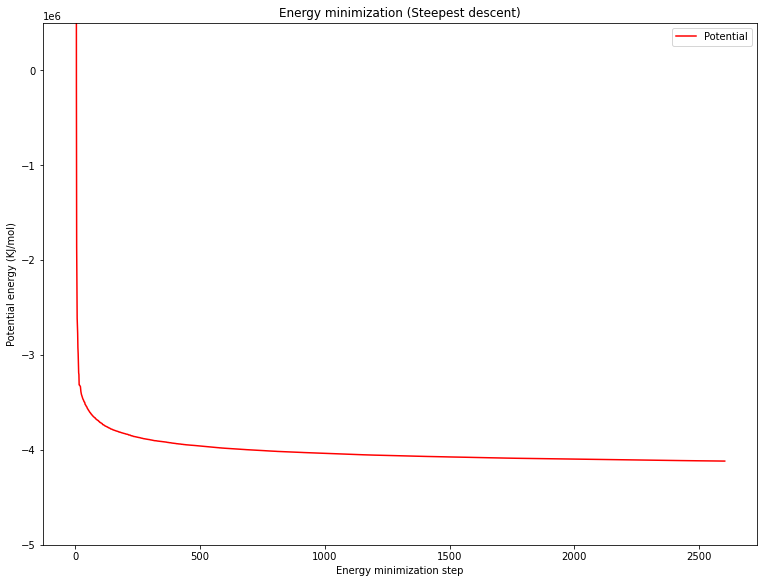

Step      em_decoy
0        0.0  3.209570e+09
1        1.0  2.178637e+08
2        2.0  5.152264e+07
3        3.0  7.748462e+06
4        4.0 -1.667405e+05
...      ...           ...
2057  2598.0 -4.117547e+06
2058  2599.0 -4.117551e+06
2059  2600.0 -4.117566e+06
2060  2601.0 -4.117566e+06
2061  2603.0 -4.117657e+06

[2062 rows x 2 columns]

In [2]:
x,y = np.loadtxt("potential.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
ax1 = fig.add_subplot(111)
ax1.set_title("Energy minimization (Steepest descent)")    
ax1.set_xlabel('Energy minimization step')
ax1.set_ylabel('Potential energy (KJ/mol)')
ax1.plot(x,y, c='r', label='Potential')
plt.ylim(-5.0e+06,0.5e+06)
leg = ax1.legend()
plt.show()  

emplot_decoy=x,y 
emplot_decoy=pd.DataFrame(emplot_decoy)
emplot_decoy=emplot_decoy.T
emplot_decoy.columns=['Step','em_decoy']
emplot_decoy.to_csv('emplot_decoy.csv')
emplot_decoy

### Restraining the ligand during equilibration

<p>In order to permit a correct equilibration of the solvent around the protein and the ligand, harmonic restraints are applied to the heavy atoms of the ligand and the protein (avoiding difussion of the ligand outside the active site). The heavy atoms of the ligand are selected by a <b>index gromacs group (ndx)</b>, and position restraints are generated for this selection (with a <b>force constant of 1000 KJ/mol</b>)</p>

In [16]:
%%bash
#gmx make_ndx -f decoy_docked.gro -o index_decoy_docked.ndx
#...
# > 0 & ! a H*
# > q

Couldn't find program: 'bash'


In [17]:
%%bash
#gmx genrestr -f decoy_docked.gro -n index_decoy_docked.ndx -o posre_decoy_docked.itp -fc 1000 1000 1000

Couldn't find program: 'bash'


<p>The position restraints topology file generated is used to modify the topology and include that modification into the restraints of the protein. Here the position restraints are coupled (protein and ligand)</p>

```
; Include Position restraint file
#ifdef POSRES
#include "posre.itp"
#endif

; Ligand position restraints
#ifdef POSRES
#include "posre_decoy_docked.itp"
#endif

; Include water topology
#include "amber99sb-ildn.ff/tip3p.itp"

#ifdef POSRES_WATER
; Position restraint for each water oxygen
[ position_restraints ]
;  i funct       fcx        fcy        fcz
   1    1       1000       1000       1000
#endif

; Include topology for ions
#include "amber99sb-ildn.ff/ions.itp"
```

### Thermal equilibration in NVT ensemble

<p>A thermal equilibration is carrying out by modified Berendsen thermostat V-rescale (couple temperature to external heat bath according to Berendsen method). The reference temperature is 37°C (310 K) and the time of equilibration is 100 ps. The V-rescale thermostat method relaxes very quickly and has small fluctuations, it is useful for equilibration. Two groups were created to be coupled to the thermostat: Protein-ligand & Ions-Solvent (waters). The next .mdp and line of commands are used for the equilibration. Also the temperature is plotted:</p>

<p>First, we create an index with protein and ligand as a unique subsystem</p>

In [ ]:
#gmx make_ndx -f em.gro -o index.ndx
#> 1 | 13
#> q

In [12]:
%%bash
less nvt.mdp

title                   =  HKII-ligand NVT force field NVT equilibration
define                  = -DPOSRES     ; position restrain the protein

; Run parameters
integrator              = md           ; leap-frog integrator
nsteps                  = 50000        ; 2 * 50000 = 100 ps
dt                      = 0.002        ; 2 fs

; Output control
nstxout                 = 500          ; save coordinates every 1.0 ps
nstfout                 = 500          ; save forces every 1.0 ps
nstvout                 = 500          ; save velocities every 1.0 ps
nstenergy               = 500          ; save energies every 1.0 ps
nstlog                  = 500          ; update log file every 1.0 ps
nstcalcenergy           = 100          ; frequency for calculating the energies

; Bond parameters
continuation            = no        ; first dynamics run
constraint_algorithm    = lincs     ; holonomic constraints 
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter        

In [18]:
%%bash
#gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr

Couldn't find program: 'bash'


In [19]:
%%bash
#gmx mdrun -deffnm nvt -ntomp 12 -v

Couldn't find program: 'bash'


In [ ]:
%%bash
#gmx energy -f nvt.edr -o temperature.xvg
#>16 0

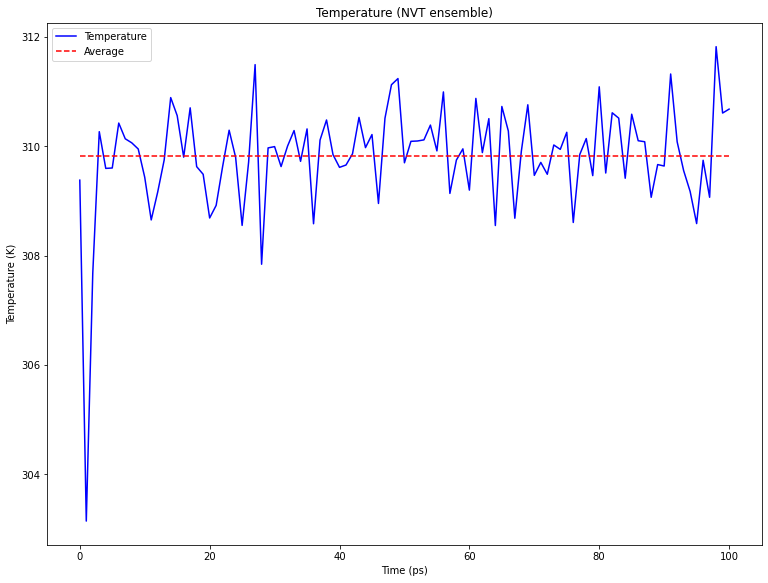

time   Teq_decoy
0      0.0  309.380188
1      1.0  303.144592
2      2.0  307.682678
3      3.0  310.266876
4      4.0  309.595337
..     ...         ...
96    96.0  309.743927
97    97.0  309.067108
98    98.0  311.822083
99    99.0  310.607971
100  100.0  310.679810

[101 rows x 2 columns]

In [3]:
x_T,y_T = np.loadtxt("temperature.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_T_mean = [np.mean(y_T)]*len(x_T)

ax1 = fig.add_subplot(111)
ax1.set_title("Temperature (NVT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Temperature (K)')
ax1.plot(x_T,y_T, c='b', label='Temperature')
ax1.plot(x_T,y_T_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()  

temperaeq_decoy=x_T,y_T
temperaeq_decoy=pd.DataFrame(temperaeq_decoy)
temperaeq_decoy=temperaeq_decoy.T
temperaeq_decoy.columns=['time','Teq_decoy']
temperaeq_decoy
temperaeq_decoy.to_csv('temperaeq_decoy.csv')
temperaeq_decoy

### Pressure and thermal equilibration in NPT ensemble

<p>A pressure and thermal equilibration is carrying out by modified Berendsen thermostat V-rescale (couple temperature to external heat bath according to Berendsen method) and Berendsen barostat. The reference temperature is 37°C (310 K) and the reference pressure is 1 bar (100000 Pa). The time of equilibration is 100 ps. Two groups were created to be coupled to the thermostat and barostat: Protein-ligand & Ions-Solvent (waters). The next .mdp and line of commands are used for the equilibration. Also the pressure and density are plotted:</p>

In [14]:
%%bash
less npt.mdp

title                   =  HKII-ligand NPT force field NPT equilibration 
define                  = -DPOSRES  ; position restrain the protein

; Run parameters
integrator              = md           ; leap-frog integrator
nsteps                  = 50000        ; 2 * 50000 = 100 ps
dt                      = 0.002        ; 2 fs

; Output control
nstxout                 = 500          ; save coordinates every 1.0 ps
nstfout                 = 500          ; save forces every 1.0 ps
nstvout                 = 500          ; save velocities every 1.0 ps
nstenergy               = 500          ; save energies every 1.0 ps
nstlog                  = 500          ; update log file every 1.0 ps
nstcalcenergy           = 100          ; frequency for calculating the energies

; Bond parameters
continuation            = yes          ; Restarting after NVT 
constraint_algorithm    = lincs        ; holonomic constraints 
constraints             = h-bonds      ; bonds involving H are constrained
lincs_it

In [21]:
%%bash
#gmx grompp -f npt.mdp -c nvt.gro -t nvt.cpt -r nvt.gro -p topol.top -n index.ndx -o npt.tpr

Couldn't find program: 'bash'


In [22]:
%%bash
#gmx mdrun -deffnm npt

Couldn't find program: 'bash'


In [ ]:
#gmx energy -f npt.edr -o pressure.xvg
#>18 0

In [ ]:
#gmx energy -f npt.edr -o density.xvg
#>24 0

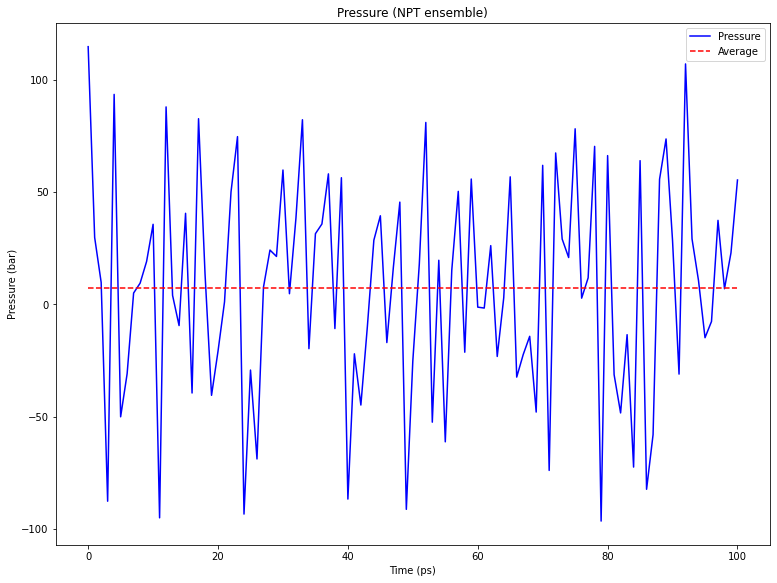

time   Peq_decoy
0      0.0  114.724274
1      1.0   29.775879
2      2.0    9.811142
3      3.0  -87.656311
4      4.0   93.473862
..     ...         ...
96    96.0   -7.621964
97    97.0   37.387802
98    98.0    6.950424
99    99.0   22.949738
100  100.0   55.364899

[101 rows x 2 columns]

In [4]:
x_V,y_V = np.loadtxt("pressure.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_V_mean = [np.mean(y_V)]*len(x_V)

ax1 = fig.add_subplot(111)
ax1.set_title("Pressure (NPT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Pressure (bar)')
ax1.plot(x_V,y_V, c='b', label='Pressure')
ax1.plot(x_V,y_V_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()

pressureeq_decoy=x_V,y_V 
pressureeq_decoy=pd.DataFrame(pressureeq_decoy)
pressureeq_decoy=pressureeq_decoy.T
pressureeq_decoy.columns=['time','Peq_decoy']
pressureeq_decoy
pressureeq_decoy.to_csv('pressureeq_decoy.csv')
pressureeq_decoy

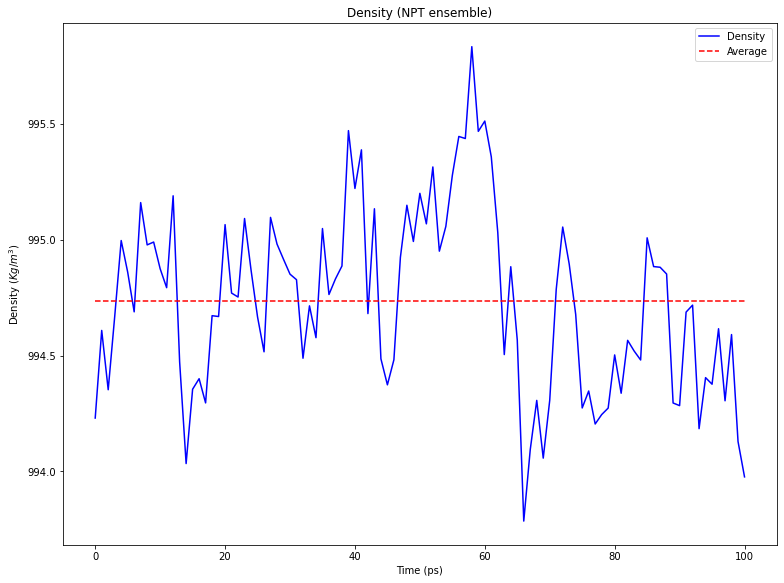

In [9]:
x_rho,y_rho = np.loadtxt("density.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_rho_mean = [np.mean(y_rho)]*len(x_rho)

ax1 = fig.add_subplot(111)
ax1.set_title("Density (NPT ensemble)")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Density ($Kg/m^{3}$)')
ax1.plot(x_rho,y_rho, c='b', label='Density')
ax1.plot(x_rho,y_rho_mean, label='Average', linestyle='--',c='r')
leg = ax1.legend()
plt.show()

### MD production

<p>After the equilibration, the position restraints are released, and the system can visit all the possible conformations in the dynamics. The production is running by <b>50 ns</b>.</p>

In [25]:
%%bash
#gmx grompp -f md.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o md_0_10.tpr

Couldn't find program: 'bash'


In [26]:
%%bash
#gmx mdrun -deffnm md_0_10 -ntomp 12 -v

Couldn't find program: 'bash'


### Recentering coordinates

<p>As in any simulation conducted with periodic boundary conditions, molecules may appear "broken" or may "jump" back and forth across the box. To recenter the protein and rewrap the molecules within the unit cell to recover the desired rhombic dodecahedral shape, <b>trjconv</b> command is used</p>

In [27]:
##Since system is too big to be read, only protein and ligand trajectories will be used (with a dt of 50 ps)
#%%bash
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10.xtc -o md_0_10noPBC_1.xtc -pbc nojump
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC_1.xtc -o md_0_10noPBC_2.xtc -pbc mol -ur compact 
#gmx editconf -f md_0_10.gro -n index.ndx -o md_0_10_ana.gro
#gmx trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o md_0_10_ana.xtc -dt 50 

Couldn't find program: 'bash'


In [ ]:
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10_mmpbsa.xtc -o ensayo.xtc -b 25000 -e 50000 

# Validation

### Reading trajectories and structure file from the MD simulation

In [13]:
u_MD = mda.Universe('md_0_10.tpr', 'md_noPBC.xtc')

In [189]:
%%bash
tail md_0_10.gro

83479NA      NA59038  11.513  12.372   3.302  0.2481  0.1641  0.1759
83480NA      NA59039   7.836   5.084   9.679  0.1751  0.5688  0.2434
83481NA      NA59040  12.571  13.792   0.608  0.0728 -0.0881  0.3490
83482NA      NA59041  13.583  12.927   4.781 -0.0910  0.1957 -0.3050
83483NA      NA59042  10.440   3.484   8.993 -0.3698  0.1678 -0.6006
83484NA      NA59043  12.374  10.665   3.896  0.0762 -0.2716 -0.7209
83485NA      NA59044  15.414   3.955   3.705 -0.0823  0.2300  0.0286
83486NA      NA59045   5.712   9.702  10.945 -0.2711 -0.0789 -0.4016
83487NA      NA59046  10.131  13.168   0.925 -0.2540 -0.2486 -0.0908
  15.49310  15.49310  10.95528   0.00000   0.00000   0.00000   0.00000   7.74656   7.74656


In [14]:
#complex_MD=u_MD.select_atoms("resname LIG" and "resid 17:911")
complex_MD=u_MD.select_atoms("resid 17:911")+u_MD.select_atoms("resname MOL")

In [191]:
u_MD.trajectory

<XTCReader md_0_10_mmpbsa.xtc with 5001 frames of 259046 atoms>

In [15]:
MD_movie=nv.show_mdanalysis(complex_MD,gui=True)
MD_movie

NGLWidget(max_frame=1000)

## Physical validation of the simulations

<p>A first step to check if the MD simulations are reliable consists to verify the behavior of certain observables under a thermodynamic ensemble of study. Some rules of thumb are:

<ul><li><b>Conservation of energy and momentum: </b>Checking kinetic (E<sub>K</sub>) and total energy (E<sub>T</sub>) conservation and convergence. As a rule of thumb, E<sub>T</sub>/E<sub>K</sub> &lt; 0.05 for a well behaved system.</li>
<li><b>Reliable observables: </b>Checking differences between density, using experimental reliable data of solution (in this case, since its water, protein, and some cations, the density would be a little bit different when it's compared with the density of pure water at T= 310K and P= 1 Bar). Here, the density of pure water at the thermodynamic state given by P and T is 993.36 Kg/m<sup>3</sup> <i>[Cengel, Y. A., Boles, M. A., & Kanoglu, M. (2011). Thermodynamics: an engineering approach (Vol. 5, p. 445). New York: McGraw-hill.]</i></li>
</ul></p>    


#### Conservation of energy and momentum

In [ ]:
#gmx_mpi energy -f md_0_10.edr -o tot_ener.xvg
#>13 0

In [ ]:
#gmx_mpi energy -f md_0_10.edr -o kin_ener.xvg
#>12 0

In [ ]:
#gmx_mpi energy -f md_0_10.edr -o md_density.xvg
#>23 0

<Figure size 921.6x691.2 with 0 Axes>

<Figure size 921.6x691.2 with 0 Axes>

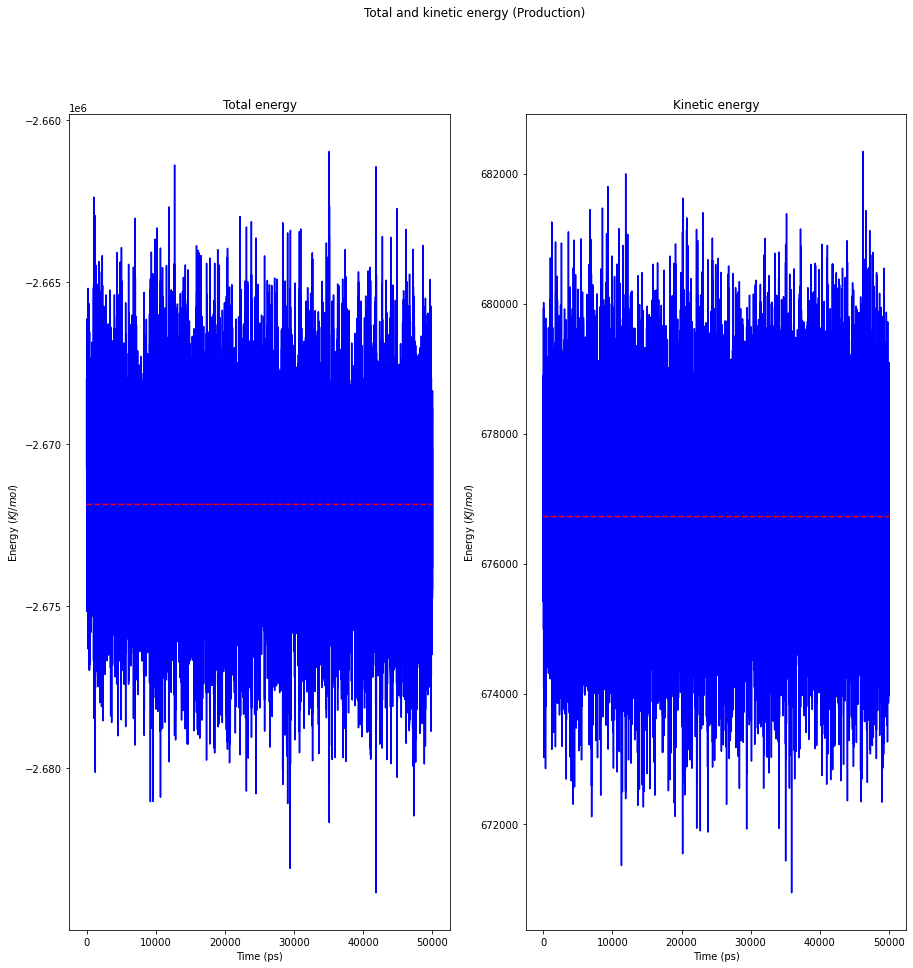

In [18]:
##Total energy
x_totener,y_totener = np.loadtxt("tot_ener.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_totener_mean = [np.mean(y_totener)]*len(y_totener)

##Kinetic energy
x_kinener,y_kinener = np.loadtxt("kin_ener.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_kinener_mean = [np.mean(y_kinener)]*len(y_kinener)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
fig.suptitle('Total and kinetic energy (Production)')

ax1.set_title("Total energy")    
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Energy ($KJ/mol$)')
ax1.plot(x_totener,y_totener, c='b', label='Total energy')
ax1.plot(x_totener,y_totener_mean, label='Average', linestyle='--',c='r')

ax2.set_title("Kinetic energy")    
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Energy ($KJ/mol$)')
ax2.plot(x_kinener,y_kinener, c='b', label='Kinetic energy')
ax2.plot(x_kinener,y_kinener_mean, label='Average', linestyle='--',c='r')

plt.show()

In [19]:
R=np.mean(y_totener)/np.mean(y_kinener)
print(R)

-3.948225756279927


<p>So according to the total and kinetic ratio, the system is well behaved, i.e.,  <b>R &lt; 0.05</b></p>

#### Reliable observables

/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/edward/anaconda3/envs/MD/lib/python3.6/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


time  rhoeq_decoy
0          0.0   993.976257
1          2.0   993.714050
2          4.0   993.644409
3          6.0   993.812988
4          8.0   994.110657
...        ...          ...
24996  49992.0   994.183777
24997  49994.0   993.527710
24998  49996.0   992.880554
24999  49998.0   992.565613
25000  50000.0   992.573120

[25001 rows x 2 columns]

<Figure size 921.6x691.2 with 0 Axes>

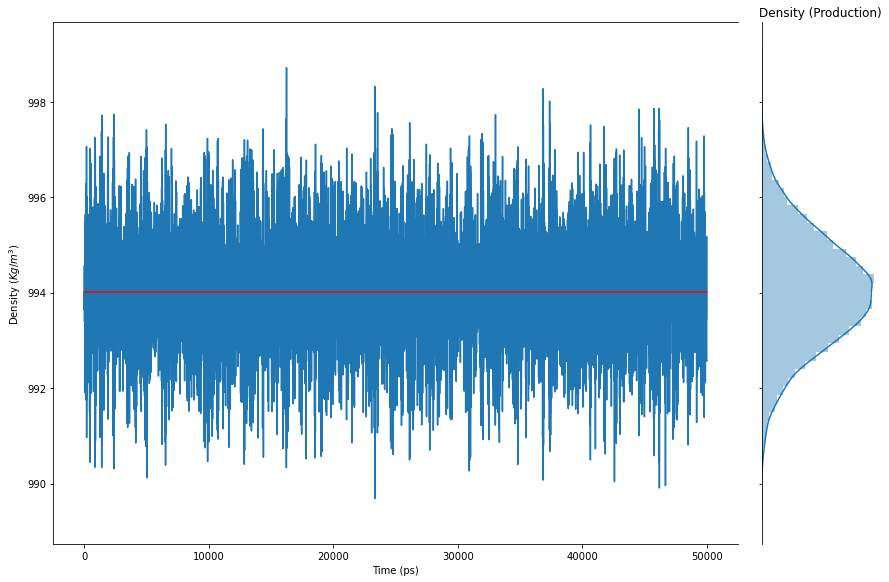

In [6]:
##Extracting density
x_md_rho,y_md_rho = np.loadtxt("md_density.xvg",comments=['#','@'],unpack=True)
fig = plt.figure(figsize=[12.8, 9.6])
y_md_rho_mean = [np.mean(y_md_rho)]*len(y_md_rho)

grid_npt = sns.JointGrid(x_md_rho, y_md_rho, ratio=5)
grid_npt.plot_joint(plt.plot)
grid_npt.ax_joint.plot(x_md_rho, y_md_rho_mean, c='red')

plt.sca(grid_npt.ax_marg_y)
sns.distplot(grid_npt.y, kde=True, vertical=True)

# override a bunch of the default JointGrid style options
grid_npt.fig.set_size_inches(12.8, 9.6)
grid_npt.ax_marg_x.remove()
grid_npt.ax_joint.spines['top'].set_visible(True)
grid_npt.set_axis_labels('Time (ps)', 'Density ($Kg/m^{3}$)')
plt.title("Density (Production)") 


density_decoy=x_md_rho,y_md_rho
density_decoy=pd.DataFrame(density_decoy)
density_decoy=density_decoy.T
density_decoy.columns=['time','rhoeq_decoy']
density_decoy
density_decoy.to_csv('density_decoy.csv')
density_decoy

In [21]:
rho_teorico=993.36 
Error_rho=(abs(np.mean(y_md_rho)-rho_teorico)/rho_teorico)*100
print(Error_rho)

0.06566945666781192


<p>So according to the absolute error between the true value and the average density from NPT ensemble, the system is well behaved ( <b>%Error=0.07</b> for pure water at T=310 K and P= 1 Bar).</p>

## Structural and statistical validation of the simulations

<p>The only way to get reliable results from the MD is by guaranteeing that a correct statistical NPT ensemble is being sampled. Also that the experimental observables are well reproduced and that there are not strange behaviors on the system. When all of these statements are checked, it is possible to quantify the variable of interest, i. e. the free energy. Here we check the above assumptions by means of different tests given by the literature.</p>

### Root mean square deviation of the protein and the ligand (RMSD)

<p>The RMSD is a qualitative measure of the deviation of the position of the atoms in the system across the simulation. Formally, is a function of time of the <b>euclidean distance in configuration space of the current configuration (after appropriate translation and rotation transformations) from a reference configuration</b>, divided by the number of coordinates. This test is the first one that should be check to have an insight into convergence of simulation</p>

In [2]:
##Since system is too big to be read, only protein and ligand trajectories will be used (with a dt of 50 ps)
#%%bash

#gmx_mpi trjconv -s npt.tpr -f npt.gro -n index.ndx -o npt_ana.gro -pbc mol -ur compact
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10.gro -n index.ndx -o md_0_10_ana.gro -pbc mol -ur compact
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o md_0_10_ana.xtc -dt 50 
#gmx_mpi trjconv -s em.tpr -f em.gro -n index.ndx -o emcenter.gro -pbc mol -ur compact

#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC_2.xtc -n index.ndx -o md_0_10_ana_2.xtc -dt 50 

In [7]:
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
import MDAnalysis.analysis.rms

reference=mda.Universe('emcenter.gro') 
u_ana = mda.Universe('md_0_10_ana.gro','md_0_10_ana.xtc') 

In [6]:
##Checking trajectories

MD_movie_ana=nv.show_mdanalysis(u_ana,gui=True)
MD_movie_ana

NGLWidget(max_frame=1000)

In [8]:
R_prot = MDAnalysis.analysis.rms.RMSD(u_ana, reference,select="protein and backbone")                                   
R_prot.run()

In [9]:
R_lig = MDAnalysis.analysis.rms.RMSD(u_ana, reference,select="resname MOL")                                   
R_lig.run()

In [10]:
#Function to get averages
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

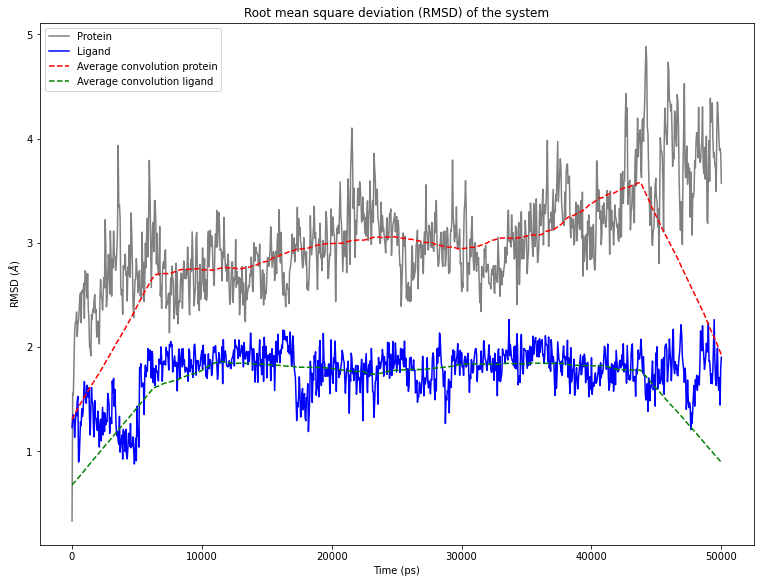

In [11]:
%matplotlib inline
rmsd = R_prot.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig = plt.figure(figsize=[12.8, 9.6])
ax = fig.add_subplot(111)
rmsd_lig=R_lig.rmsd.T

ax.plot(time, rmsd[2], 'gray',  label="Protein")
ax.plot(time, rmsd_lig[2], 'b-',  label="Ligand")
ax.plot(time,moving_average(rmsd[2],250), label='Average convolution protein', linestyle='--',c='r')
ax.plot(time,moving_average(rmsd_lig[2],250), label='Average convolution ligand', linestyle='--',c='g')

ax.set_title("Root mean square deviation (RMSD) of the system")    
ax.legend(loc="best")
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")
plt.show()

In [12]:
pd.DataFrame(rmsd.T).to_csv('rmsd_decoy.csv')
pd.DataFrame(rmsd_lig.T).to_csv('rmsdlig_decoy.csv')

<p>If numerous transitions among apparent metastable regions (RMSD fluctuates rapidly about a local mean) are seeing, there is an adequate sampling for the configurational space given by the simulation. On other hand, if RMSD changes only in one direction or exhibits few transitions among apparent metastable regions, there is not good sampling. One can see that both entities (protein and ligand) are fluctuating according to the first statement. Of course, protein has more transitions since all the degrees of freedom.</p>

### All-to-all Root mean square deviation of the atoms (Pairwise RMSD)

<p>An all-to-all RMSD plot is better to check convergence since one can identify very similar structures during the time series. The idea behind this kind of RMSD is to calculate RMSD between each snapshot of the trajectory against all the others snapshots.</p> 

In [152]:
aligner_pairmsd_protein = align.AlignTraj(u_ana, u_ana, select='protein and backbone',in_memory=True).run()
aligner_pairmsd_ligand=align.AlignTraj(u_ana, u_ana, select="resname MOL",in_memory=True).run()

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [153]:
from MDAnalysis.analysis import diffusionmap, align, rms

matrix_pairmsd_protein = diffusionmap.DistanceMatrix(u_ana, select='protein and backbone').run()
matrix_pairmsd_lig = diffusionmap.DistanceMatrix(u_ana, select='resname MOL').run()

Text(0.5, 1.0, 'All-to-all Root mean square deviation of the atoms (Protein Backbone)')

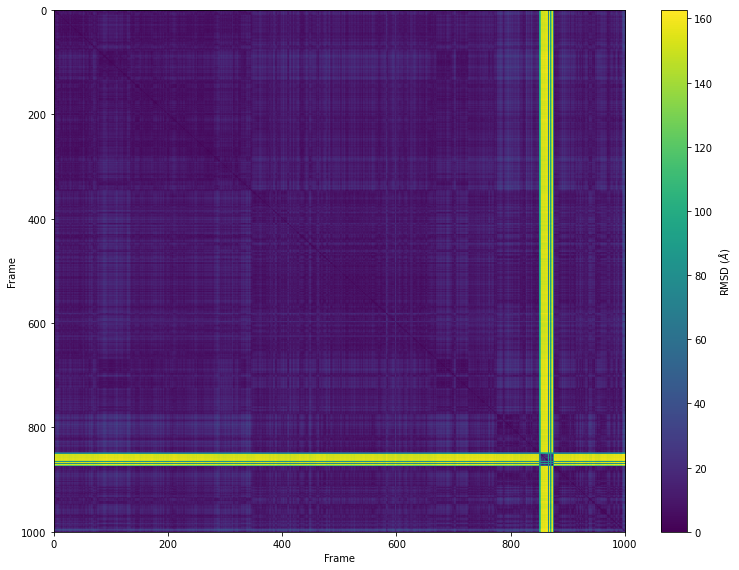

In [154]:
fig = plt.figure(figsize=[12.8, 9.6])
plt.imshow(matrix_pairmsd_protein.dist_matrix, cmap='viridis',aspect='auto')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
ax.set_title("All-to-all Root mean square deviation of the atoms (Protein Backbone)")     

Text(0.5, 1.0, 'All-to-all Root mean square deviation of the atoms (Ligand)')

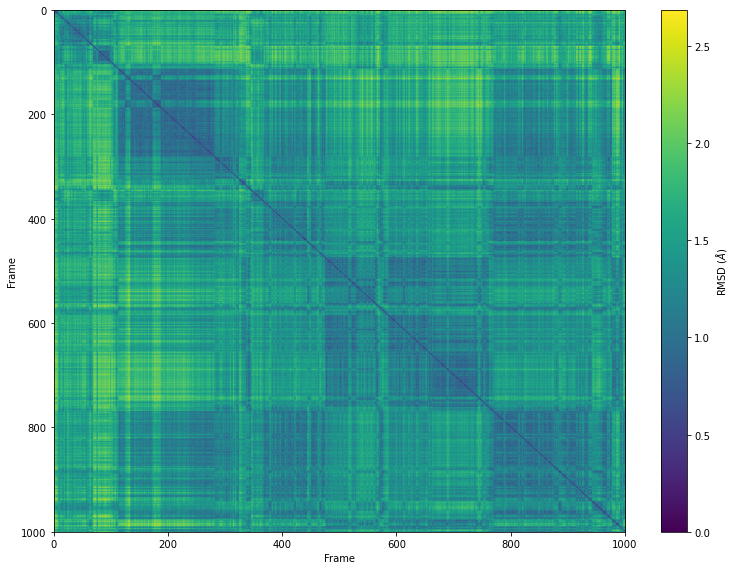

In [155]:
fig = plt.figure(figsize=[12.8, 9.6])
plt.imshow(matrix_pairmsd_lig.dist_matrix, cmap='viridis',aspect='auto')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
ax.set_title("All-to-all Root mean square deviation of the atoms (Ligand)")  

<p>This plot has values of zero along the diagonal. Blocks of similar RMSD along the diagonal refers to the occupation of a given state in the sampling. One can see that there are two big states in this simulation (between 100 and 500 frames and 600 to 800 frames) and also two or three transition states before and after these two. 

Regions of low RMSD between structures sampled far apart in time (blue regions far apart from the diagonal) indicate that the system is visiting again sampled states, and that is a necessary condition for good statistics (And here this occurs).</p>

### Combined clustering test

<p>Another test to check the convergence of structure population is the combined clustering strategy. Here, the trajectory is split into two or more independent trajectories and in each trajectory, a cluster analysis is performed (using a similarity index like matrix distance or RMSD). Thus, major conformational substates of the system's trajectory can be identified and good sampling behavior can be checked.</p>

In [ ]:
##Splitting trajectory in two blocks (with a dt of 50 ps)
#%%bash

#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o split1_ana.xtc -dt 50 -b 0 -e 25000 
#gmx_mpi trjconv -s md_0_10.tpr -f md_0_10noPBC.xtc -n index.ndx -o split2_ana.xtc -dt 50 -b 25000 -e 50000 

In [182]:
split1 = mda.Universe('md_0_10_ana.gro','split1_ana.xtc')
split2 = mda.Universe('md_0_10_ana.gro','split2_ana.xtc')
labels = ['First half', 'Second half']

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [183]:
##Checking trajectories

MD_movie_split=nv.show_mdanalysis(split2,gui=True)
MD_movie_split

NGLWidget(max_frame=500)

In [73]:
from MDAnalysis.analysis import encore
from MDAnalysis.analysis.encore.dimensionality_reduction import DimensionalityReductionMethod as drm

pc1 = drm.PrincipalComponentAnalysis(dimension=1,
                                     svd_solver='auto')
pc2 = drm.PrincipalComponentAnalysis(dimension=2,
                                     svd_solver='auto')
pc3 = drm.PrincipalComponentAnalysis(dimension=3,
                                     svd_solver='auto')
pc4 = drm.PrincipalComponentAnalysis(dimension=4,
                                     svd_solver='auto')

In [74]:
dres2, details2 = encore.dres([split1, split2],
                         select='name CA',
                         dimensionality_reduction_method=[pc1, pc2, pc3, pc4],
                         ncores=4)
print(len(dres2), len(details2['reduced_coordinates']))

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


4 4


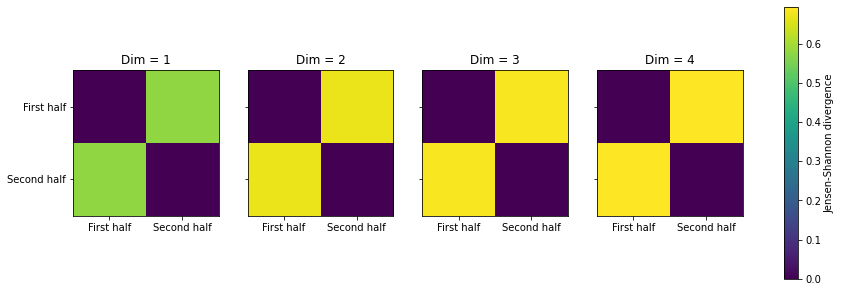

In [75]:
titles = ['Dim = {}'.format(n) for n in range(1, 5)]
fig2, axes = plt.subplots(1, 4, sharey=True, figsize=(15, 5))


for i, (data, title) in enumerate(zip(dres2, titles)):
    
    imi = axes[i].imshow(data, vmax=np.log(2), vmin=0)
    axes[i].set_xticks(np.arange(2))
    axes[i].set_xticklabels(labels)
    axes[i].set_title(title)
plt.yticks(np.arange(2), labels)
cbar2 = fig2.colorbar(imi, ax=axes.ravel().tolist())
cbar2.set_label('Jensen-Shannon divergence')

<p>Mathematicly, cluster analysis and dimensionality reduction by means of PCA are equivalent. Therein, one can apply the combined clustering test in a PCA reduction among the first and second halves of the simulation (25 ns each chunk). It is clear that after two PC, there are two blocks of identical conformational ensembles and each of these sampled ensembles are uncorrelated between them (Here we used Jensen-Shannon divergence parameter, which states that a value of 0 corresponds to an identical probability density function and a value of Ln(2) corresponds to no similarity between both ensembles (Here we can see the two uncorrelated blocks, so the simulation is reliable sampling states among the configurational space.</p>

In [76]:
def zip_data_with_labels(reduced):
    rd_split1 = reduced[:, :501]  # first 501 frames
    rd_split2 = reduced[:, 501:(501+500)]  # next 500 frames
    return zip([rd_split1, rd_split2], labels)
rd_p1, rd_p2, rd_p3, rd_p4= details2['reduced_coordinates']

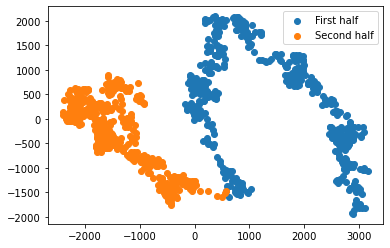

In [77]:
rd_p2_fig, rd_p2_ax = plt.subplots(1,1)
for data, label in zip_data_with_labels(rd_p2):
    rd_p2_ax.scatter(*data, label=label)
plt.legend()

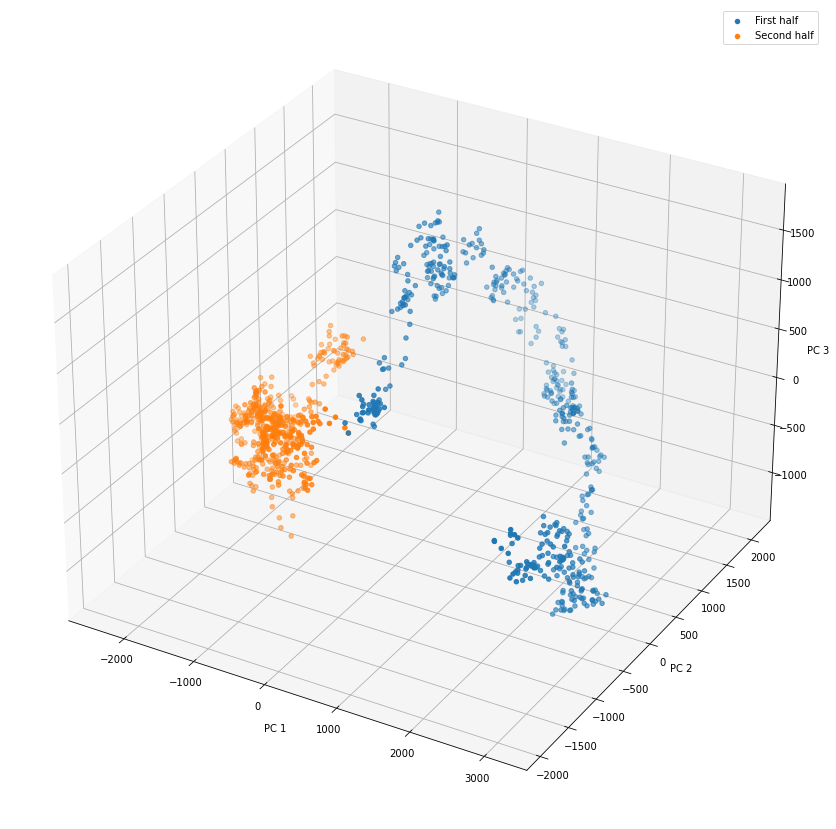

In [78]:

rd_p3_fig = plt.figure(figsize=(15, 15))
rd_p3_ax = rd_p3_fig.add_subplot(111, projection='3d')
for data,label in zip_data_with_labels(rd_p3):
    rd_p3_ax.scatter(*data, label=label)
rd_p3_ax.set_xlabel('PC 1')
rd_p3_ax.set_ylabel('PC 2')
rd_p3_ax.set_zlabel('PC 3')
plt.legend()

<p>As a final check using this test, one can project the trajectories onto the two and three PCs of the dimensionality reduction. It is clear that there is two blocks of data in each half; and each block is uncorrelated with the other. Interestingly, the data is mainly varying among the second PC, so maybe with the three PCs one can capture the most important conformations of the system along the trajectories.</p>

### Global sampling assesment using autocorrelation function

<p>The final step to validate the good sampling of an MD simulation is using the autocorrelation function C(t). The idea behind this is to calculate the correlation between an observable that depends on time against itself and also, against itself after an arbitrary delay. If the correlation is minimal, one can say that the system does not have "memory" along the trajectories and there is a good statistical sampling of the configurational space since each configuration is independent, uncorrelated, and only depends on the delay.</p>

#### Global sampling assesment 

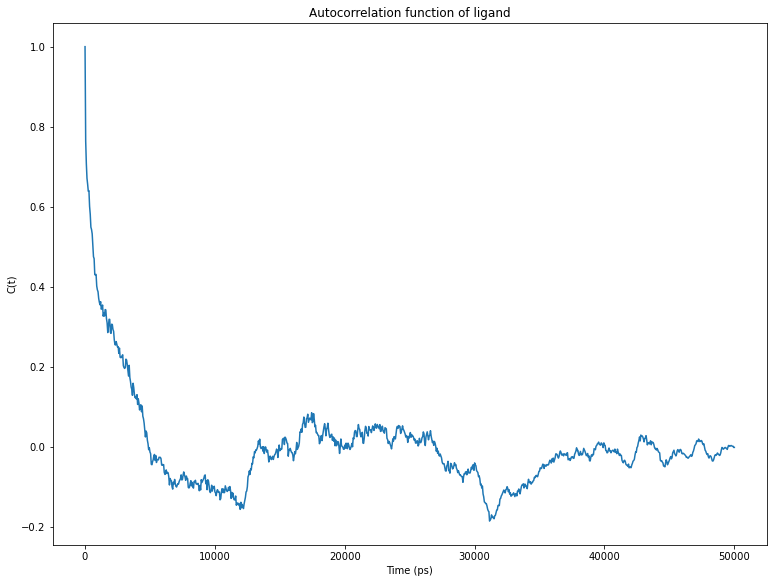

In [12]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

fig = plt.figure(figsize=[12.8, 9.6])
plt.plot(time, autocorr(rmsd_lig[2]))
plt.xlabel("Time (ps)")
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of ligand")

matrix_autocorr=time, autocorr(rmsd_lig[2])
autocorr_decoy=pd.DataFrame(matrix_autocorr)
autocorr_decoy=autocorr_decoy.T
autocorr_decoy.columns=['time','c(t)_decoy']
autocorr_decoy
autocorr_decoy.to_csv('autocorr_decoy.csv')

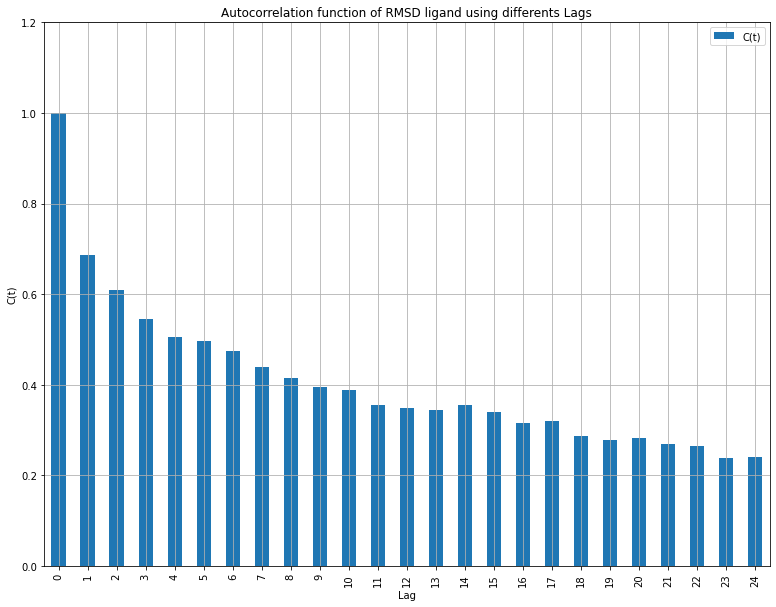

In [80]:
def acf_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    # Subtract the mean of the whole series x to calculate Cov
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    # Normalize with var of whole series
    return sum_product / ((len(x) - lag) * np.var(x))


results = {}
nlags=25
results["C(t)"] = [acf_by_hand(rmsd_lig[2], lag) for lag in range(nlags)]

pd.DataFrame(results).plot(kind="bar", figsize=(13,10), grid=True)
plt.xlabel("Lag")
plt.ylim([0, 1.2])
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of RMSD ligand using differents Lags")
plt.show()

#### Block sampling assesment 

In [82]:
splitting=[split1,split2]

times_block=[]
backbones_block=[]

for i in splitting:
    block_rms=MDAnalysis.analysis.rms.RMSD(i, i,select="resname MOL")                                   
    block_rms.run()
    total_block=block_rms.rmsd.T
    
    time_block=total_block[1]
    times_block.append(time_block)
    backbone_block=total_block[2]
    backbones_block.append(backbone_block)

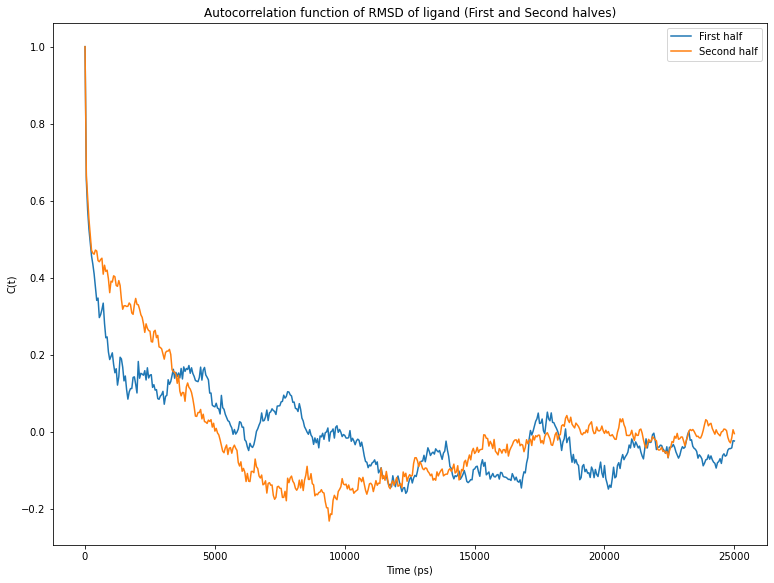

In [83]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

fig = plt.figure(figsize=[12.8, 9.6])
plt.plot(times_block[0], autocorr(backbones_block[0]))
plt.plot(times_block[1], autocorr(backbones_block[1]))
plt.xlabel("Time (ps)")
plt.ylabel("C(t)")
plt.title(r"Autocorrelation function of RMSD of ligand (First and Second halves)")
plt.legend(['First half', 'Second half'])

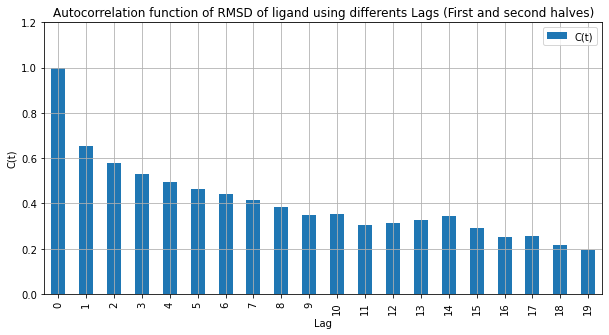

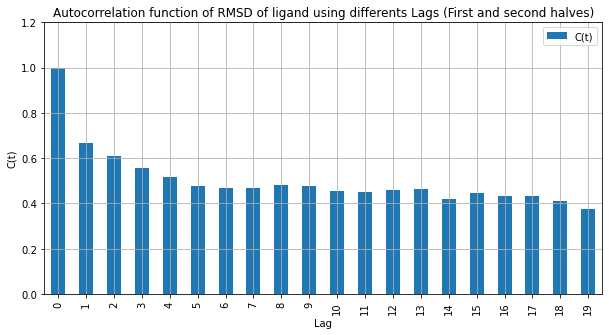

In [84]:
def acf_by_hand(x, lag):
    # Slice the relevant subseries based on the lag
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    # Subtract the mean of the whole series x to calculate Cov
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    # Normalize with var of whole series
    return sum_product / ((len(x) - lag) * np.var(x))

for i in backbones_block:
    results = {}
    nlags=20
    results["C(t)"] = [acf_by_hand(i, lag) for lag in range(nlags)]

    pd.DataFrame(results).plot(kind="bar", figsize=(10,5), grid=True)
    plt.xlabel("Lag")
    plt.ylim([0, 1.2])
    plt.ylabel("C(t)")
    plt.title(r"Autocorrelation function of RMSD of ligand using differents Lags (First and second halves)")
    plt.show()      

<p>According to literature, estimates of autocorrelation that are independent of blocks through an arbitrary number of delays, suggest an equilibrated//steady-state system with a well-behaved sampling. Qualitatively, our simulation reasonably fulfills all of the above tests. The final step is to discard the transient time of the first 10 ns according to the RMSD plot and after that, we have confidence in all the structural, dynamical, and thermodynamical parameters estimated from this simulation.</p>

# Structural analysis

### Root mean square fluctuation of the atoms of the residues of the protein (RMSF)

<p>The RMSF is a qualitative measure of the deviation of the position of the atoms in the system by a time average. Formally, is the <b>euclidean distance in configuration space of the current configuration (after appropiate translation and rotation transformations) from a reference configuration averaged over time</b>.</p>

In [13]:
from MDAnalysis.analysis.rms import RMSF

calphas = u_ana.select_atoms("name CA")
rmsfer = RMSF(calphas, verbose=True).run()

rmsf_decoy=calphas.resnums, rmsfer.rmsf
rmsf_decoy=pd.DataFrame(rmsf_decoy)
rmsf_decoy=rmsf_decoy.T
rmsf_decoy.columns=['res_num','rmsf_decoy']
rmsf_decoy
rmsf_decoy.to_csv('rmsf_decoy.csv')
rmsf_decoy

  0%|          | 0/1001 [00:00<?, ?it/s]

res_num  rmsf_decoy
0       17.0   31.720084
1       18.0   30.599763
2       19.0   28.516768
3       20.0   29.172574
4       21.0   29.089557
..       ...         ...
890    907.0   15.009457
891    908.0   15.200645
892    909.0   15.749617
893    910.0   16.040793
894    911.0   16.633231

[895 rows x 2 columns]

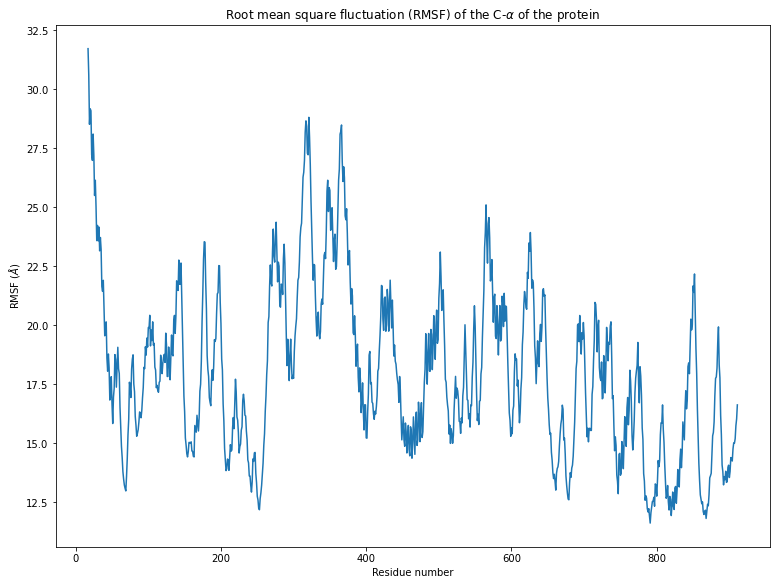

In [14]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = fig.add_subplot(111)
plt.plot(calphas.resnums, rmsfer.rmsf)
ax.set_title(r"Root mean square fluctuation (RMSF) of the C-$\alpha$ of the protein")    
ax.set_xlabel("Residue number")
ax.set_ylabel(r"RMSF ($\AA$)")
plt.show()

<p>Here, one can see residues with high displacement alog the simulation, specially the region between 100 to 200 residues, 250 to 350 residues, and 500 to 600 residues. Interestingly, the interacting residues according to 5HEX relies from 150 to 250 residues in the N-term. And 650 to 850 in te C-term. So there is a lot of fluctuation in the residues of the N-ten compared with the C-term. This is expected since the C-term is being occupied by the ligand. So, what implications have these change in fluctuation of the side chains? What is the impact of the loss of configurational degrees of freedom in the side chains when the ligand is binded?</p>

### Radius of gyration

<p>The radius of gyration is a measure of the compactness of a structure. Formally is the sum of the position and masses of the atoms of the structure, relative to a arbitrary center of mass. This measure gives the radial distance to the center of mass chosen.</p>

In [87]:
import numpy.linalg

nterm = u_ana.select_atoms('protein and name N')[0]   # Takes the first atom named 'N'
cterm = u_ana.select_atoms('protein and name C')[-1]  # Takes the last atom named 'C'
bb = u_ana.select_atoms('protein and backbone')  # A selection (a AtomGroup)
for ts in u_ana.trajectory:  # Iterate through all frames
    r = (cterm.position - nterm.position)  # End-to-end vector from atom positions
    d = numpy.linalg.norm(r)   # End-to-end distance
    rgyr = bb.radius_of_gyration()  # Method of a AtomGroup; updates with each frame
    print("frame = %d: d = %f Angstroem, Rgyr = %f Angstroem" % (ts.frame, d, rgyr))

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


frame = 0: d = 115.624184 Angstroem, Rgyr = 39.216291 Angstroem
frame = 1: d = 115.292488 Angstroem, Rgyr = 39.785291 Angstroem
frame = 2: d = 116.897614 Angstroem, Rgyr = 39.613535 Angstroem
frame = 3: d = 113.918098 Angstroem, Rgyr = 39.521521 Angstroem
frame = 4: d = 115.044128 Angstroem, Rgyr = 39.633146 Angstroem
frame = 5: d = 115.127457 Angstroem, Rgyr = 40.063442 Angstroem
frame = 6: d = 115.453506 Angstroem, Rgyr = 39.872231 Angstroem
frame = 7: d = 113.241882 Angstroem, Rgyr = 39.931529 Angstroem
frame = 8: d = 115.243652 Angstroem, Rgyr = 40.045864 Angstroem
frame = 9: d = 115.022308 Angstroem, Rgyr = 40.048778 Angstroem
frame = 10: d = 114.361504 Angstroem, Rgyr = 39.848046 Angstroem
frame = 11: d = 113.951134 Angstroem, Rgyr = 40.095277 Angstroem
frame = 12: d = 114.556190 Angstroem, Rgyr = 40.009527 Angstroem
frame = 13: d = 114.933975 Angstroem, Rgyr = 39.976576 Angstroem
frame = 14: d = 114.554863 Angstroem, Rgyr = 39.774890 Angstroem
frame = 15: d = 118.405312 Angstroe

frame = 477: d = 116.180412 Angstroem, Rgyr = 39.691004 Angstroem
frame = 478: d = 114.323616 Angstroem, Rgyr = 39.523477 Angstroem
frame = 479: d = 113.953865 Angstroem, Rgyr = 39.543490 Angstroem
frame = 480: d = 116.246643 Angstroem, Rgyr = 39.658561 Angstroem
frame = 481: d = 117.850220 Angstroem, Rgyr = 40.087105 Angstroem
frame = 482: d = 116.980766 Angstroem, Rgyr = 39.844990 Angstroem
frame = 483: d = 114.954529 Angstroem, Rgyr = 39.772804 Angstroem
frame = 484: d = 115.375046 Angstroem, Rgyr = 39.600380 Angstroem
frame = 485: d = 113.622719 Angstroem, Rgyr = 39.800976 Angstroem
frame = 486: d = 113.798080 Angstroem, Rgyr = 39.656129 Angstroem
frame = 487: d = 113.440895 Angstroem, Rgyr = 39.574985 Angstroem
frame = 488: d = 113.739647 Angstroem, Rgyr = 39.721429 Angstroem
frame = 489: d = 110.725197 Angstroem, Rgyr = 39.548791 Angstroem
frame = 490: d = 113.330452 Angstroem, Rgyr = 39.461820 Angstroem
frame = 491: d = 112.949181 Angstroem, Rgyr = 39.656926 Angstroem
frame = 49

frame = 949: d = 119.005058 Angstroem, Rgyr = 40.265125 Angstroem
frame = 950: d = 119.418343 Angstroem, Rgyr = 40.145668 Angstroem
frame = 951: d = 120.483124 Angstroem, Rgyr = 40.224444 Angstroem
frame = 952: d = 117.386162 Angstroem, Rgyr = 40.276777 Angstroem
frame = 953: d = 122.331757 Angstroem, Rgyr = 40.406144 Angstroem
frame = 954: d = 119.679726 Angstroem, Rgyr = 40.418690 Angstroem
frame = 955: d = 118.834587 Angstroem, Rgyr = 40.174975 Angstroem
frame = 956: d = 120.820351 Angstroem, Rgyr = 40.217281 Angstroem
frame = 957: d = 123.046379 Angstroem, Rgyr = 40.132986 Angstroem
frame = 958: d = 118.933357 Angstroem, Rgyr = 40.163169 Angstroem
frame = 959: d = 120.156395 Angstroem, Rgyr = 40.139732 Angstroem
frame = 960: d = 117.500473 Angstroem, Rgyr = 40.154303 Angstroem
frame = 961: d = 118.130440 Angstroem, Rgyr = 40.172359 Angstroem
frame = 962: d = 119.532196 Angstroem, Rgyr = 40.501739 Angstroem
frame = 963: d = 119.218826 Angstroem, Rgyr = 40.506944 Angstroem
frame = 96

In [88]:
Rgyr = []
protein = u_ana.select_atoms("protein")
for ts in u_ana.trajectory:
   Rgyr.append((u_ana.trajectory.time, protein.radius_of_gyration()))
Rgyr = np.array(Rgyr)

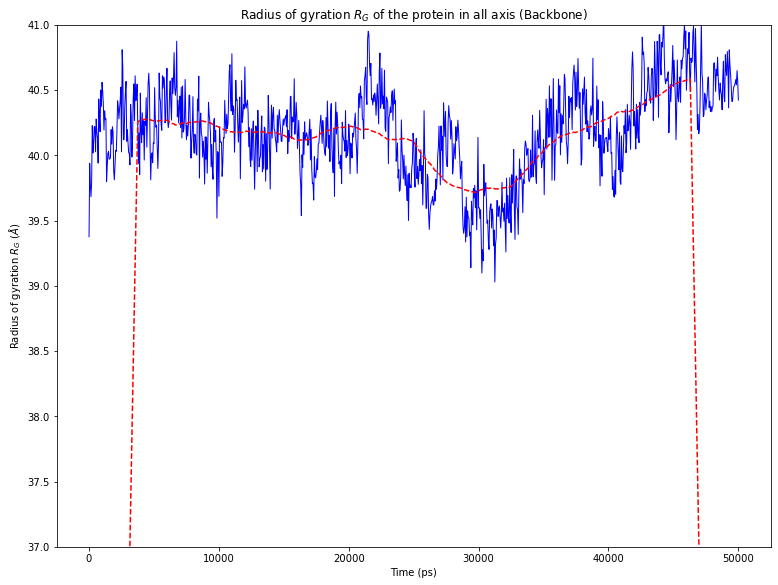

In [89]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax.plot(Rgyr[:,0], Rgyr[:,1], 'b-', lw=1, label=r"$R_G$")
ax.set_title(r"Radius of gyration $R_G$ of the protein in all axis (Backbone)") 
ax.plot(Rgyr[:,0],moving_average(Rgyr[:,1],150), label='Average convolution radius of gyration', linestyle='--',c='r')
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"Radius of gyration $R_G$ ($\AA$)")
plt.ylim(37,41)
plt.draw()

## Distance analysis

In [90]:
##Checking structures
nv.show_mdanalysis(mda.Universe('md_0_10_ana.gro'),gui=True)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


NGLWidget()

# Structural analysis

## Catalytic residue K621

<p>Experimentally, this residue is key for the catalysis of HK2. Here we measure the number of contacts along the simulation between this residue and the ligand</p>

In [3]:
##Number of contacts within a cutoff
def contacts_within_cutoff(u_ana,group_a,group_b,radius=4.0):
    timeseries=[]
    for ts in u_ana.trajectory:
        dist=contacts.distance_array(group_a.positions,group_b.positions)
        n_contacts=contacts.contact_matrix(dist,radius).sum()
        timeseries.append([ts.time,n_contacts])
    return np.array(timeseries)

In [4]:
from MDAnalysis.analysis import contacts


K621=u_ana.select_atoms("(resid 621) and (name NZ)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [5]:
frac_contc=contacts_within_cutoff(u_ana, K621,Res_LIG)
frac_contc.shape

(1001, 2)

In [6]:
frac_contc_df=pd.DataFrame(frac_contc,columns=['Time','Number of contacts'])
frac_contc_K621=frac_contc_df.copy()
frac_contc_K621.to_csv('K621_DECOY.csv')

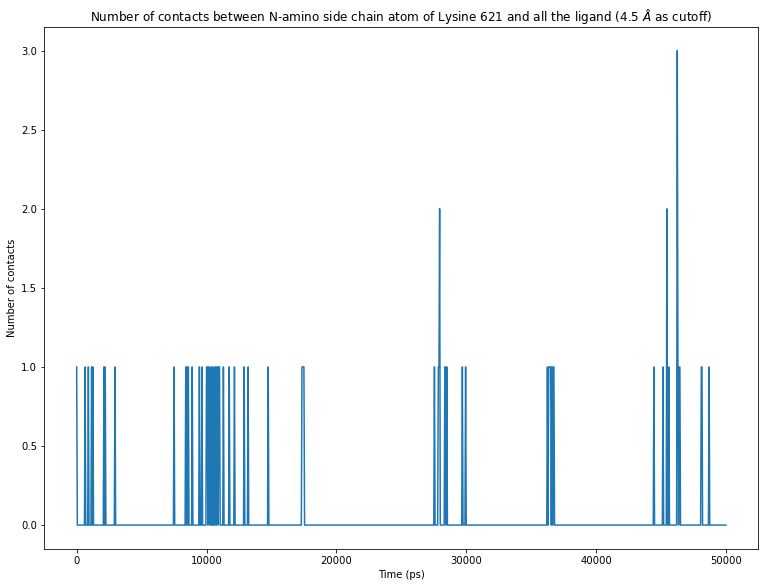

In [7]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_K621['Time'],frac_contc_K621['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between N-amino side chain atom of Lysine 621 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

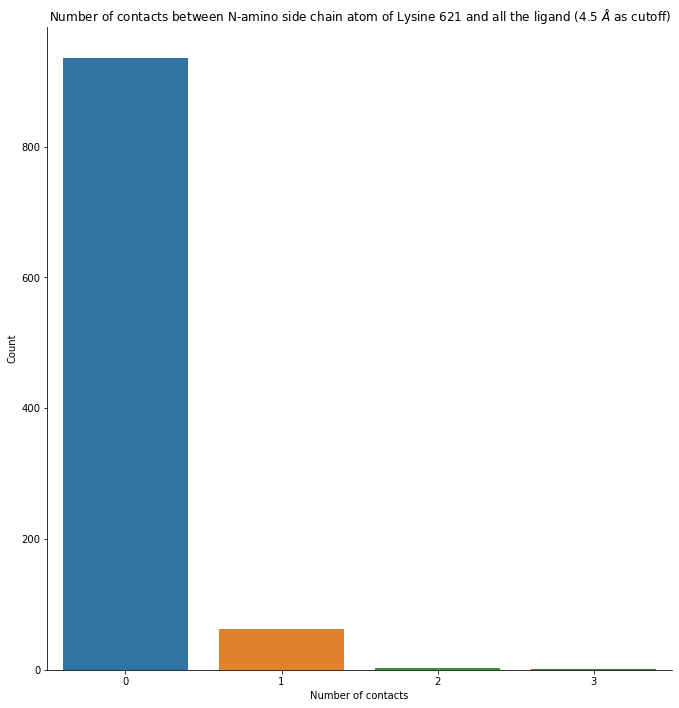

In [8]:
frac_contc_df['Number of contacts']=frac_contc_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between N-amino side chain atom of Lysine 621 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

## Catalytic and binding residue E708

<p>Experimentally, this residue is key for the binding and catalysis of HK2. Here we measure the number of contacts along the simulation between this residue and the ligand</p>

In [9]:
from MDAnalysis.analysis import contacts


E708=u_ana.select_atoms("(resid 708) and (name OE1 OE2)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [10]:
frac_contc_2=contacts_within_cutoff(u_ana, E708,Res_LIG)
frac_contc_2.shape

(1001, 2)

In [11]:
frac_contc_2_df=pd.DataFrame(frac_contc_2,columns=['Time','Number of contacts'])
frac_contc_E708=frac_contc_2_df.copy()
frac_contc_E708.to_csv('E708_DECOY.csv')
frac_contc_E708

Time  Number of contacts
0         0.0                13.0
1        50.0                12.0
2       100.0                10.0
3       150.0                 8.0
4       200.0                12.0
...       ...                 ...
996   49800.0                12.0
997   49850.0                15.0
998   49900.0                13.0
999   49950.0                13.0
1000  50000.0                11.0

[1001 rows x 2 columns]

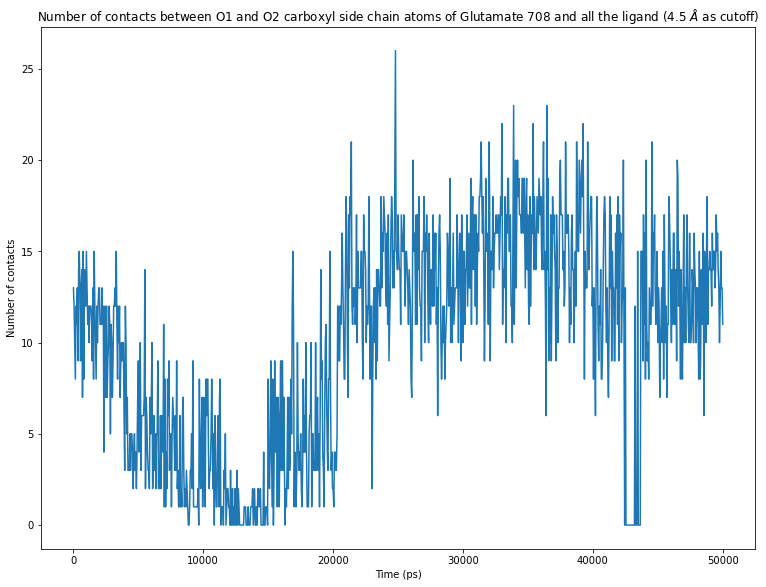

In [12]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_E708['Time'],frac_contc_E708['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between O1 and O2 carboxyl side chain atoms of Glutamate 708 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()  

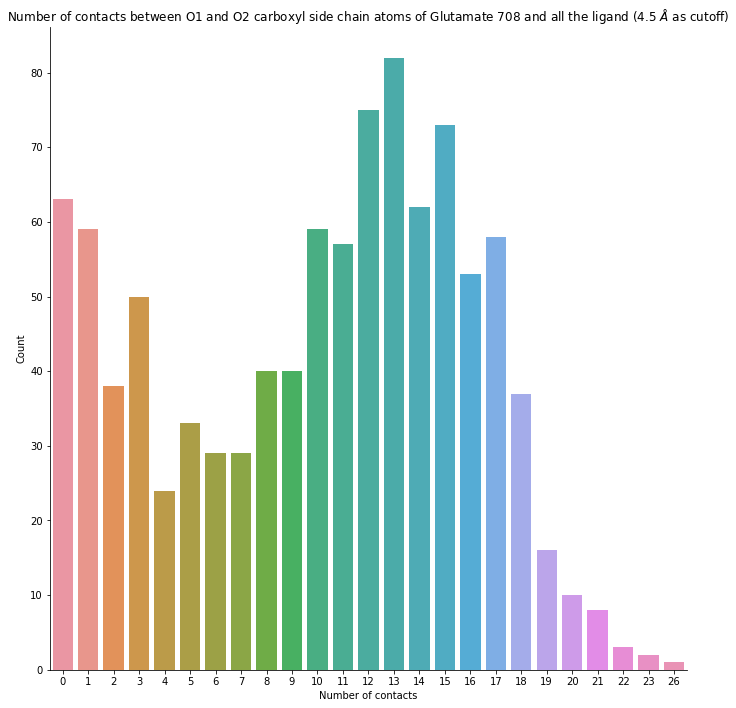

In [13]:
frac_contc_E708['Number of contacts']=frac_contc_E708['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_E708,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between O1 and O2 carboxyl side chain atoms of Glutamate 708 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

## Binding residue P605

<p>This residue is important in hydrophobic interaction of inhibitor (hydrophobic pocket according to Lin et al.)</p>

In [14]:
from MDAnalysis.analysis import contacts


P605=u_ana.select_atoms("(resid 605) and (name CG CB)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [15]:
frac_contc_3=contacts_within_cutoff(u_ana, P605,Res_LIG)
frac_contc_3.shape

(1001, 2)

In [16]:
frac_contc_3_df=pd.DataFrame(frac_contc_3,columns=['Time','Number of contacts'])
frac_contc_P605=frac_contc_3_df.copy()
frac_contc_P605.to_csv('P605_DECOY.csv')

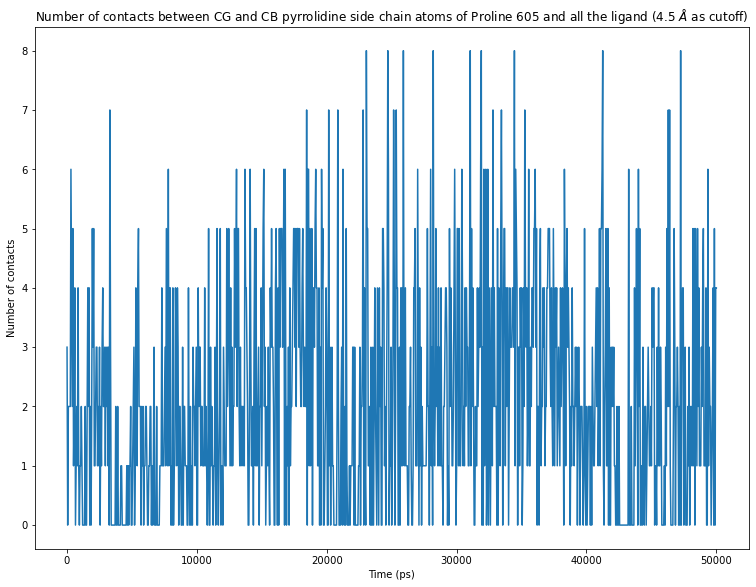

In [17]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_P605['Time'],frac_contc_P605['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between CG and CB pyrrolidine side chain atoms of Proline 605 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

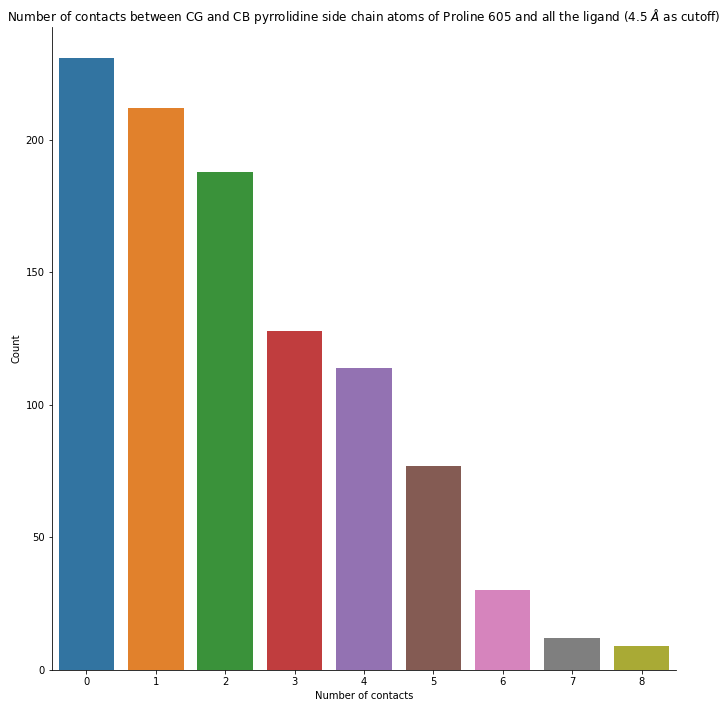

In [18]:
frac_contc_3_df['Number of contacts']=frac_contc_3_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_3_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between CG and CB pyrrolidine side chain atoms of Proline 605 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

## Binding residue G739

<p>This residue is important in hydrophobic interaction of inhibitor (hydrophobic pocket according to Lin et al.)</p>

In [19]:
from MDAnalysis.analysis import contacts


G739=u_ana.select_atoms("(resid 739) and (name NE2 CD OE1 CG)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [20]:
frac_contc_4=contacts_within_cutoff(u_ana, G739,Res_LIG)
frac_contc_4.shape

(1001, 2)

In [21]:
frac_contc_4_df=pd.DataFrame(frac_contc_4,columns=['Time','Number of contacts'])
frac_contc_G739=frac_contc_4_df.copy()
frac_contc_G739.to_csv('G739_DECOY.csv')
frac_contc_G739

Time  Number of contacts
0         0.0                 0.0
1        50.0                 0.0
2       100.0                 0.0
3       150.0                 0.0
4       200.0                 0.0
...       ...                 ...
996   49800.0                 5.0
997   49850.0                16.0
998   49900.0                 9.0
999   49950.0                 0.0
1000  50000.0                 0.0

[1001 rows x 2 columns]

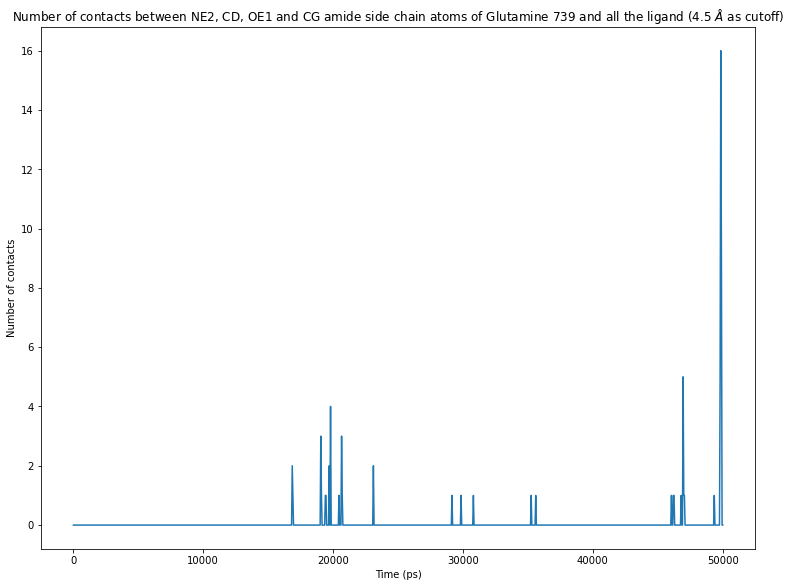

In [22]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_G739['Time'],frac_contc_G739['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between NE2, CD, OE1 and CG amide side chain atoms of Glutamine 739 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

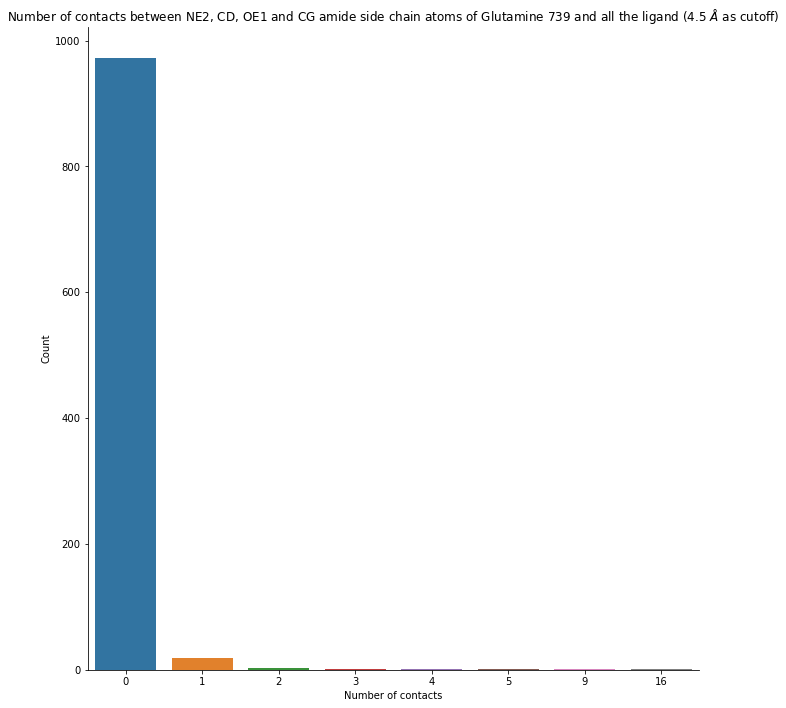

In [23]:
frac_contc_4_df['Number of contacts']=frac_contc_4_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_4_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between NE2, CD, OE1 and CG amide side chain atoms of Glutamine 739 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

## Binding residue T680

<p>This residue is key for phosphate stabilization in Glucose-6-Phosphate allosteric site.</p>

In [24]:
from MDAnalysis.analysis import contacts


T680=u_ana.select_atoms("(resid 680) and (name OG1)")
Res_LIG=u_ana.select_atoms("resname MOL")

In [25]:
frac_contc_5=contacts_within_cutoff(u_ana, T680,Res_LIG)
frac_contc_5.shape

(1001, 2)

In [26]:
frac_contc_5_df=pd.DataFrame(frac_contc_5,columns=['Time','Number of contacts'])
frac_contc_T680=frac_contc_4_df.copy()
frac_contc_T680.to_csv('T680_DECOY.csv')
frac_contc_T680

Time  Number of contacts
0         0.0                   0
1        50.0                   0
2       100.0                   0
3       150.0                   0
4       200.0                   0
...       ...                 ...
996   49800.0                   5
997   49850.0                  16
998   49900.0                   9
999   49950.0                   0
1000  50000.0                   0

[1001 rows x 2 columns]

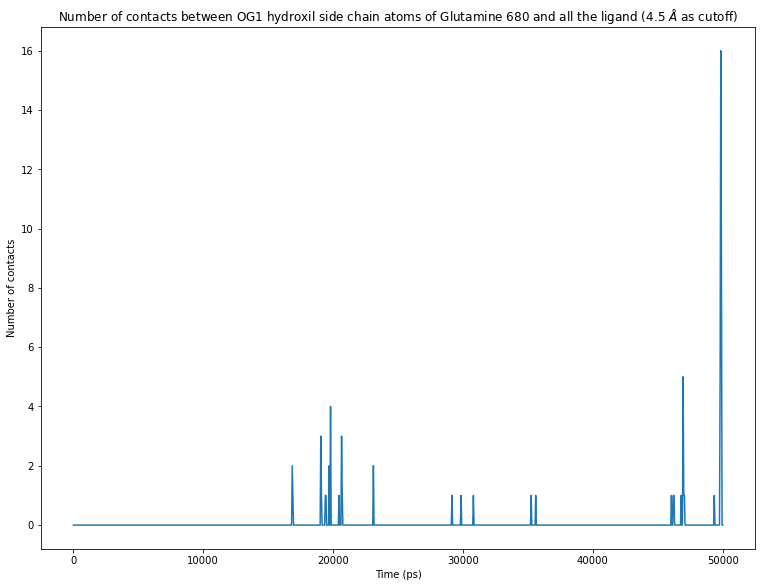

In [27]:
fig = plt.figure(figsize=[12.8, 9.6])

plt.plot(frac_contc_T680['Time'],frac_contc_T680['Number of contacts'])
plt.xlabel("Time (ps)")
plt.ylabel("Number of contacts")
plt.title(r"Number of contacts between OG1 hydroxil side chain atoms of Glutamine 680 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show()

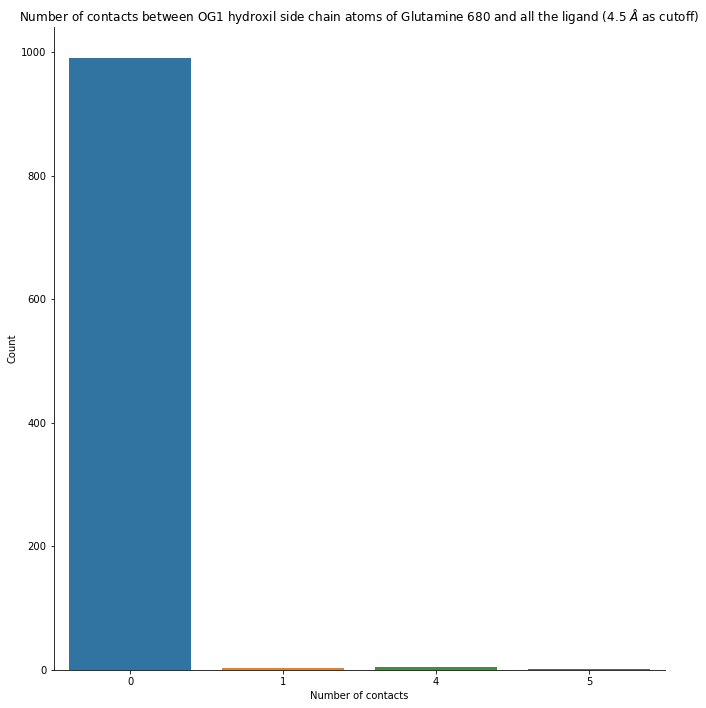

In [28]:
frac_contc_5_df['Number of contacts']=frac_contc_5_df['Number of contacts'].astype(int)
g=sns.catplot(data=frac_contc_5_df,x='Number of contacts',kind='count')
g.fig.set_size_inches(10,10)
plt.xlabel("Number of contacts")
plt.ylabel("Count")
plt.title(r"Number of contacts between OG1 hydroxil side chain atoms of Glutamine 680 and all the ligand (4.5 $\AA$ as cutoff)")
plt.show() 

# Thermodynamic analysis

<p>Since there's a reliability to recover thermodynamic information from the simulations, here MM-PB(GB)SA-IE will be used to calculate an affinity between the ligand and the protein. Using suggestions from literature, approximately 500 snapshots will be used (from 30 to 50 ns) and with a dt of 60 ps (guaranteeing that there is no correlation between snapshots according to autocorrelation time analysis).</p>

In [52]:
from GMXMMPBSA import API as gmxMMPBSAapi

In [53]:
data = gmxMMPBSAapi.load_gmxmmpbsa_info('_GMXMMPBSA_info')

In [54]:
#%%bash
#gmx_MMPBSA -O -i mmpbsa.in -cs md_0_10.tpr -ci index_mmpbsa.ndx -cg 1 13 -ct md_0_10_mmpbsa.xtc -lm decoy.mol2 -eo output


In [55]:
delta=pd.DataFrame(data[0]['gb']['delta'])
receptor=pd.DataFrame(data[0]['gb']['receptor'])
ligand=pd.DataFrame(data[0]['gb']['ligand'])
complejo=pd.DataFrame(data[0]['gb']['complex'])
entropia=pd.DataFrame(data[0]['ie']['data'])

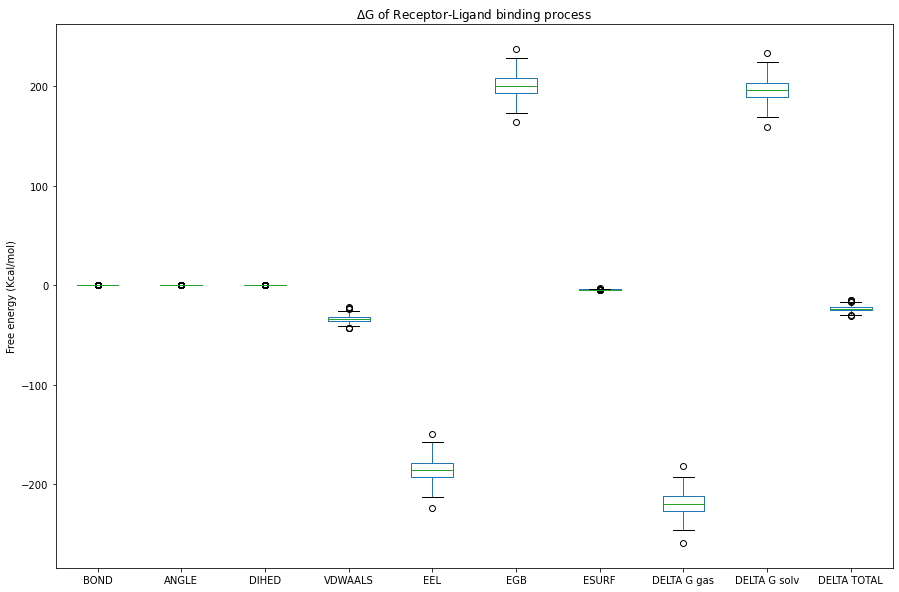

In [56]:
delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',kind='box',figsize=[15, 10])
plt.show()

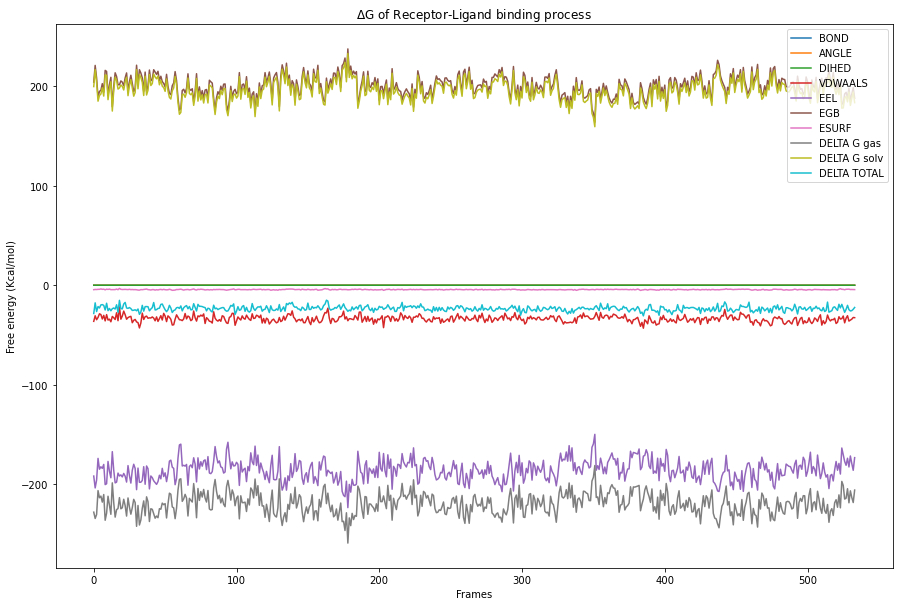

In [57]:
delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
plt.show()

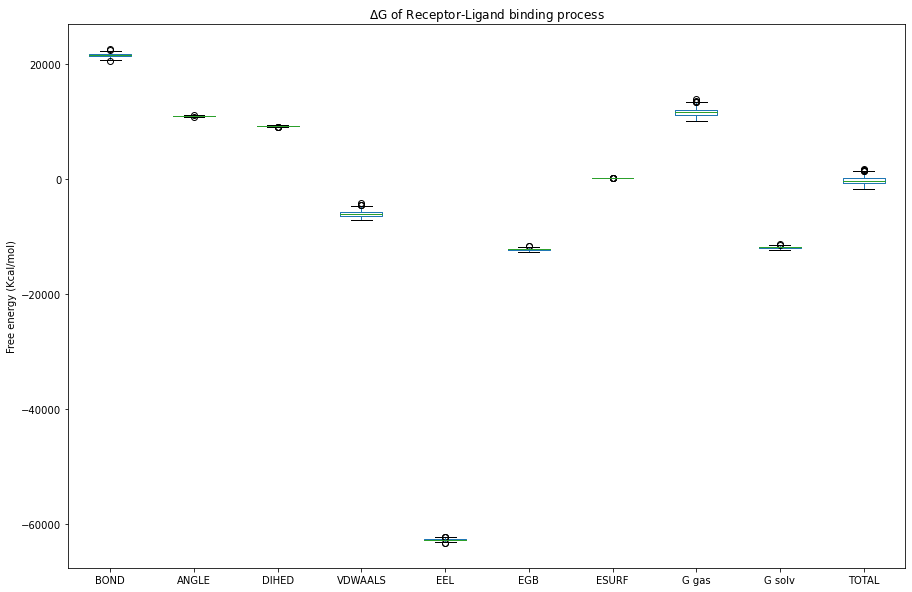

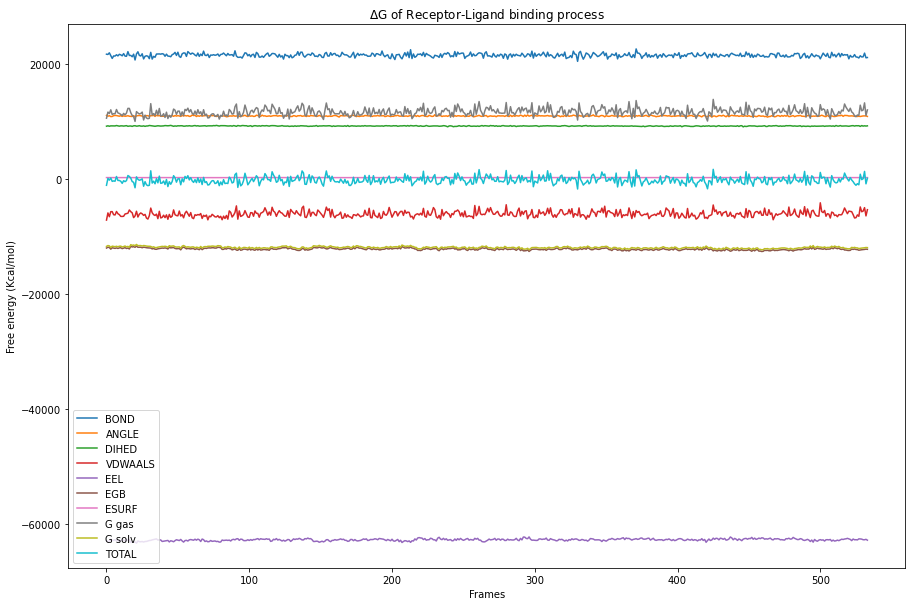

In [58]:
complejo[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','G gas','G solv', 'TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',kind='box',figsize=[15, 10])
complejo[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','G gas','G solv', 'TOTAL']].plot(ylabel='Free energy (Kcal/mol)',title=r'$\Delta$G of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
plt.show()

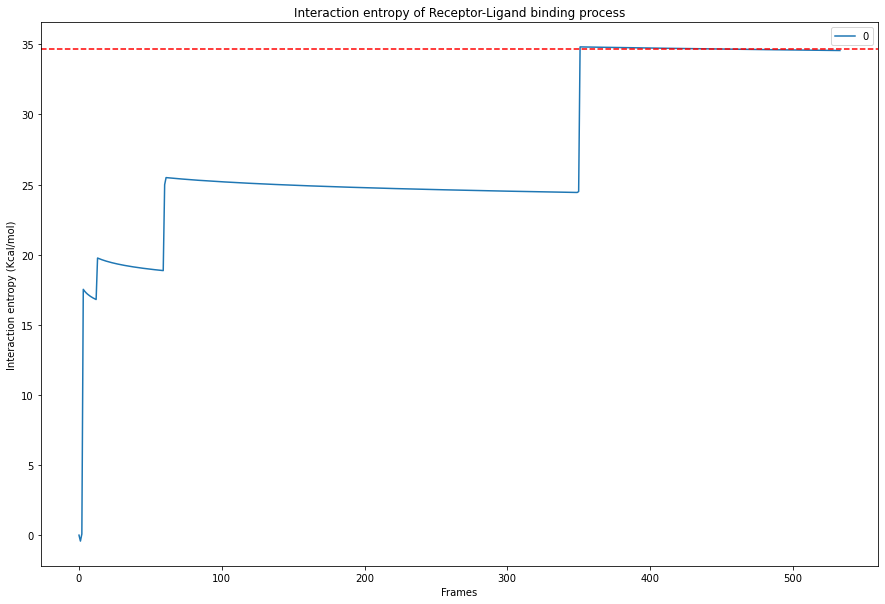

In [59]:
entropia.plot(ylabel='Interaction entropy (Kcal/mol)',title=r'Interaction entropy of Receptor-Ligand binding process',xlabel='Frames',figsize=[15, 10])
entropia.columns=['Interaction entropy']
plt.axhline(y=data[0]['ie']['value'], color='r', linestyle='--')

<AxesSubplot:title={'center':'$\\Delta$G energy decomposition of Receptor-Ligand binding process'}, ylabel='Energy (Kcal/mol)'>

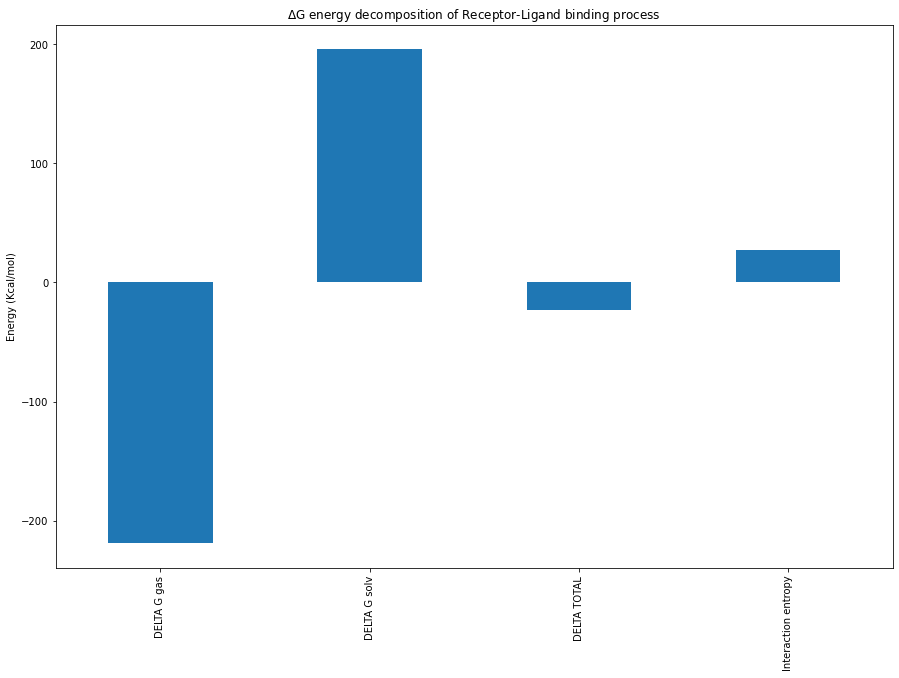

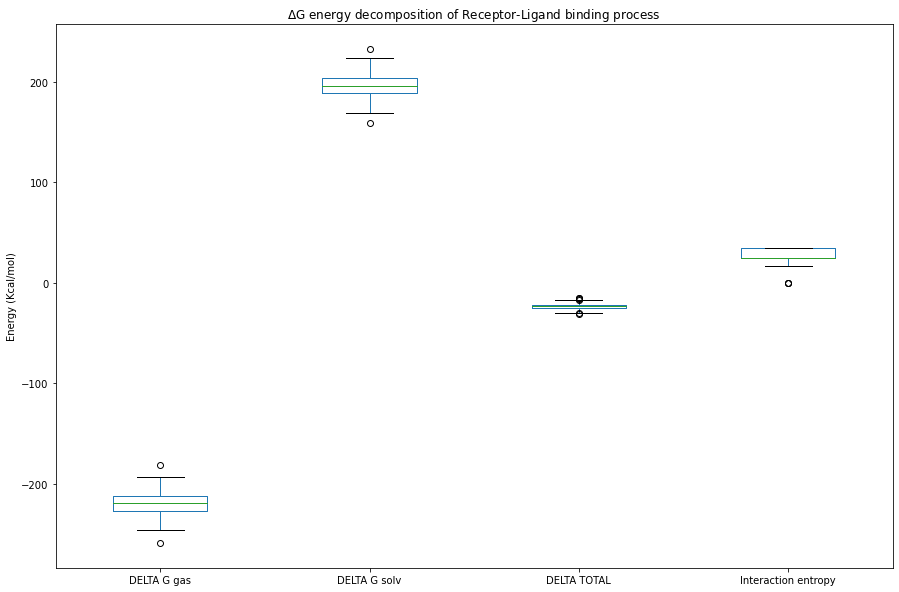

In [60]:
delta_parcial = pd.concat([delta[['BOND','ANGLE','DIHED','VDWAALS','EEL','EGB','ESURF','DELTA G gas','DELTA G solv', 'DELTA TOTAL']],entropia],axis=1)
delta_parcial[['DELTA G gas','DELTA G solv', 'DELTA TOTAL','Interaction entropy']].mean().plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process',kind='bar',figsize=[15, 10])
delta_parcial[['DELTA G gas','DELTA G solv', 'DELTA TOTAL','Interaction entropy']].plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process',kind='box',figsize=[15, 10])


In [61]:
delta_total=delta_parcial[['DELTA TOTAL','Interaction entropy']]
delta_total.columns=['Enthalpy (dH)','Interaction entropy (-TdS)']
delta_total['Total free energy (dG)'] = delta_total['Enthalpy (dH)'] + delta_total['Interaction entropy (-TdS)']
delta_total

/tmp/ipykernel_2328/3236776303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_total['Total free energy (dG)'] = delta_total['Enthalpy (dH)'] + delta_total['Interaction entropy (-TdS)']


Enthalpy (dH)  Interaction entropy (-TdS)  Total free energy (dG)
0       -28.351817                    0.000000              -28.351817
1       -17.674759                   -0.423343              -18.098101
2       -26.417994                    0.082084              -26.335910
3       -21.378733                   17.529180               -3.849553
4       -22.830697                   17.391742               -5.438955
..             ...                         ...                     ...
529     -24.510298                   34.565153               10.054855
530     -25.831299                   34.563992                8.732693
531     -25.460072                   34.562833                9.102762
532     -24.120593                   34.561677               10.441084
533     -22.292816                   34.560522               12.267706

[534 rows x 3 columns]

<AxesSubplot:title={'center':'$\\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy'}, ylabel='Energy (Kcal/mol)'>

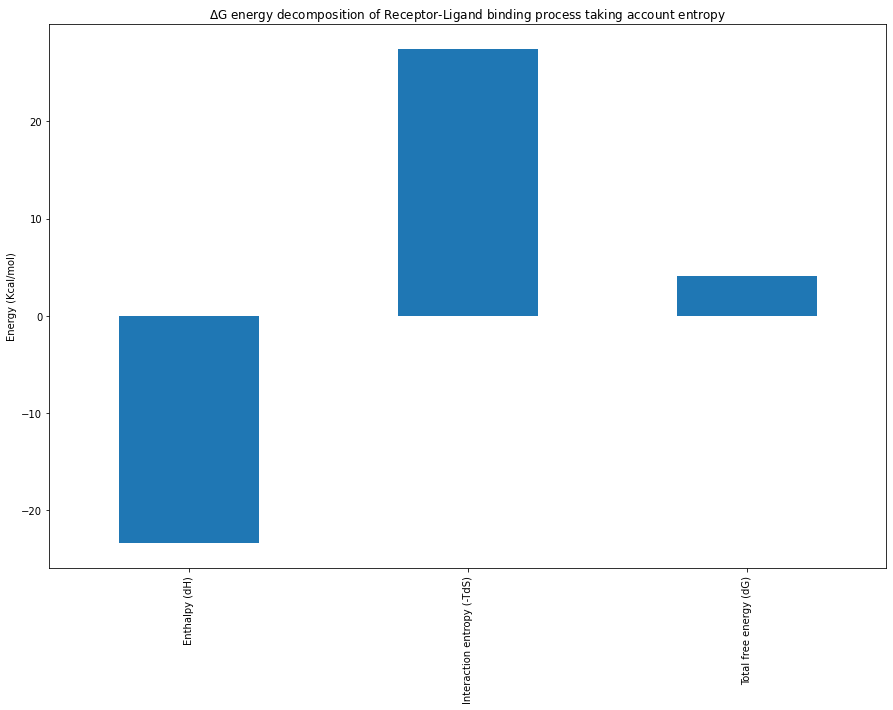

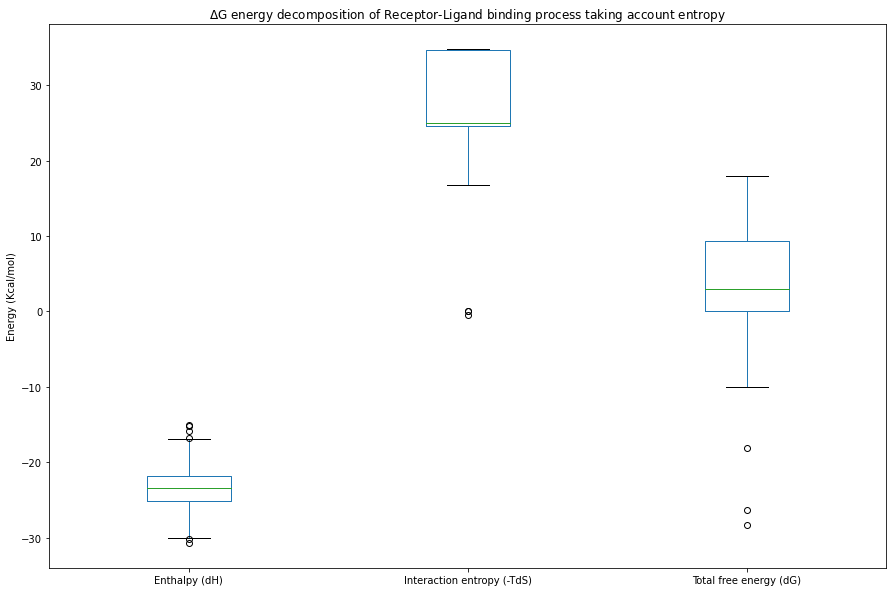

In [62]:
delta_total.mean().plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy',kind='bar',figsize=[15, 10])
delta_total.plot(ylabel='Energy (Kcal/mol)',title=r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy',kind='box',figsize=[15, 10])


Text(0.5, 1.0, '$\\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy')

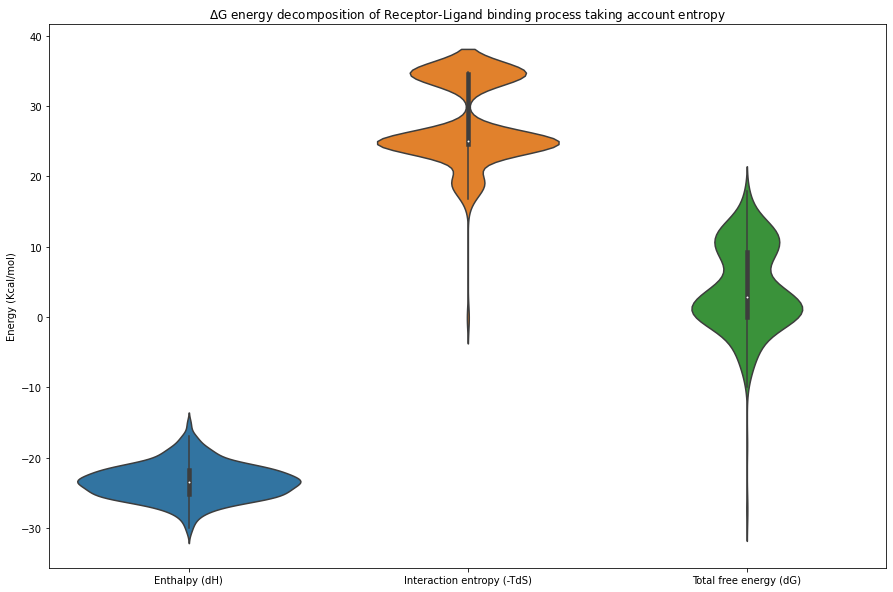

In [63]:
fig = plt.figure(figsize=[15, 10])
ax1 = fig.add_subplot(111)
ax1.set_ylabel(r"Energy (Kcal/mol)")
sns.violinplot(data=delta_total,scale="area")
plt.title(r'$\Delta$G energy decomposition of Receptor-Ligand binding process taking account entropy')

In [64]:
delta_total.describe()

Enthalpy (dH)  Interaction entropy (-TdS)  Total free energy (dG)
count     534.000000                  534.000000              534.000000
mean      -23.371339                   27.422141                4.050803
std         2.495209                    5.834317                6.129514
min       -30.732434                   -0.423343              -28.351817
25%       -25.110636                   24.579783                0.011393
50%       -23.434262                   24.980900                2.912595
75%       -21.805395                   34.619485                9.282532
max       -15.005201                   34.817215               17.948581

In [65]:
delta_total.to_csv('dG_total_decoy.csv')

In [66]:
delta_parcial.to_csv('dG_parcial_decoy.csv')

## Checking normality distribution of data

In [67]:
from scipy.stats import shapiro

##Function to check normality

def normality_test(X):

    (stat,p)=shapiro(X)
    P=p   
    alpha=0.05
    if P>alpha:
            print('Sample looks Gaussian (fail to reject H0)')
    else:
            print('Sample does not look Gaussian (reject H0)')    

### Total data

In [68]:
delta_total.apply(normality_test,axis=0)

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


Enthalpy (dH)                 None
Interaction entropy (-TdS)    None
Total free energy (dG)        None
dtype: object

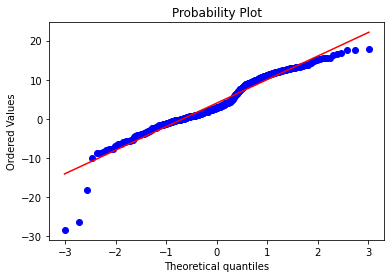

In [69]:
import pylab
import scipy.stats as stats

stats.probplot((delta_total['Total free energy (dG)']),dist='norm',plot=pylab)
pylab.show()

### Decomposition data

In [70]:
delta_parcial.apply(normality_test,axis=0)

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


BOND                   None
ANGLE                  None
DIHED                  None
VDWAALS                None
EEL                    None
EGB                    None
ESURF                  None
DELTA G gas            None
DELTA G solv           None
DELTA TOTAL            None
Interaction entropy    None
dtype: object

## Bootstraping of non-normal data to build confidence intervals

In [71]:
##Function to boostraping (empirical bootstraping)

from tqdm import tqdm

def estadistico_media(X):
    
    estadistico=np.mean(X)
    return(estadistico)

def boostraping_media(X,fun_estadistico,n_iteraciones=100000):
    
    n=len(X)
    stadistico_muestra=fun_estadistico(X)
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(X,size=n,replace=True)
        dist_boot[i]=fun_estadistico(resample)
   
    return dist_boot

In [72]:
import scipy.stats as stats

def Confidence_Intervals(X,n):
##IC Bootstraping empírico
    cuantiles=np.quantile(a=X,q=[0.025,0.975])
    print('------------------')
    print('Empirical interval')
    print('------------------')
    print(cuantiles)

### Decomposition data

In [73]:
parcial_bootstrapeado=delta_parcial.apply(boostraping_media,fun_estadistico=estadistico_media,n_iteraciones=100000,axis=0)
parcial_bootstrapeado

100%|████████████████████████████████| 100000/100000 [00:04<00:00, 22176.61it/s]


BOND         ANGLE     DIHED    VDWAALS         EEL  \
0      7.490639e-07 -2.434457e-06 -0.000004 -33.673976 -185.255394   
1     -5.617978e-07 -1.685393e-06 -0.000004 -33.559485 -185.113564   
2     -1.498127e-06 -1.872658e-07 -0.000005 -33.845909 -185.615973   
3     -1.872659e-06  3.339817e-14 -0.000003 -34.160585 -185.726137   
4     -6.179775e-06  1.685393e-06 -0.000005 -33.745817 -185.817007   
...             ...           ...       ...        ...         ...   
99995 -1.872659e-07 -1.685393e-06 -0.000006 -33.905405 -186.039139   
99996 -1.685393e-06 -7.490636e-07 -0.000007 -33.601851 -185.568425   
99997 -3.745317e-07  1.872659e-07 -0.000003 -33.819704 -185.839755   
99998 -1.123595e-06 -9.363295e-07 -0.000005 -33.761189 -185.958295   
99999 -5.430711e-06  3.745319e-07 -0.000006 -33.946530 -184.696930   

              EGB     ESURF  DELTA G gas  DELTA G solv  DELTA TOTAL  \
0      199.790987 -4.374087  -218.962251    195.680138   -23.307539   
1      200.416114 -4.374117  -218.501303    196.003786   -23.428351   
2      200.276973 -4.381138  -219.789095    196.339722   -23.371143   
3      199.728062 -4.371536  -218.862190    195.587533   -23.519917   
4      200.569613 -4.381890  -218.819712    196.210511   -23.434837   
...           ...       ...          ...           ...          ...   
99995  199.738996 -4.371262  -218.579524    196.463970   -23.369816   
99996  199.537516 -4.368329  -219.442043    195.100275   -23.528777   
99997  199.343824 -4.371276  -219.588933    195.531508   -23.173151   
99998  199.725844 -4.393026  -219.471487    196.228575   -23.250140   
99999  200.272200 -4.373915  -218.891577    195.683209   -23.212043   

       Interaction entropy  
0                27.444909  
1                26.771866  
2                27.075312  
3                27.680871  
4                27.436118  
...                    ...  
99995            27.389467  
99996            27.276945  
99997            27.487195  
99998            27.868757  
99999            27.198742  

[100000 rows x 11 columns]

In [74]:
parcial_bootstrapeado.apply(Confidence_Intervals,n=100000,axis=0)

------------------
Empirical interval
------------------
[-6.36704115e-06  2.24719107e-06]
------------------
Empirical interval
------------------
[-4.86891379e-06  3.74531842e-06]
------------------
Empirical interval
------------------
[-7.49063674e-06  3.74531846e-07]
------------------
Empirical interval
------------------
[-33.95308174 -33.42673159]
------------------
Empirical interval
------------------
[-186.43668395 -184.66328756]
------------------
Empirical interval
------------------
[199.37099915 201.11019052]
------------------
Empirical interval
------------------
[-4.3955747  -4.34804416]
------------------
Empirical interval
------------------
[-220.14569567 -218.33455878]
------------------
Empirical interval
------------------
[195.00531933 196.73692771]
------------------
Empirical interval
------------------
[-23.5832655  -23.15783119]
------------------
Empirical interval
------------------
[26.92633771 27.91400265]


BOND                   None
ANGLE                  None
DIHED                  None
VDWAALS                None
EEL                    None
EGB                    None
ESURF                  None
DELTA G gas            None
DELTA G solv           None
DELTA TOTAL            None
Interaction entropy    None
dtype: object

In [75]:
parcial_bootstrapeado.apply(estadistico_media,axis=0)

BOND                  -2.058708e-06
ANGLE                 -5.585355e-07
DIHED                 -3.554783e-06
VDWAALS               -3.369012e+01
EEL                   -1.855520e+02
EGB                    2.002414e+02
ESURF                 -4.371827e+00
DELTA G gas           -2.192421e+02
DELTA G solv           1.958719e+02
DELTA TOTAL           -2.337161e+01
Interaction entropy    2.742107e+01
dtype: float64

### Total data

In [76]:
total_boostrapeado=delta_total.apply(boostraping_media,fun_estadistico=estadistico_media,n_iteraciones=100000,axis=0)

100%|████████████████████████████████| 100000/100000 [00:04<00:00, 22176.30it/s]


In [77]:
total_boostrapeado.apply(Confidence_Intervals,n=100000,axis=0)

------------------
Empirical interval
------------------
[-23.58274122 -23.15982153]
------------------
Empirical interval
------------------
[26.92554363 27.91312286]
------------------
Empirical interval
------------------
[3.52747378 4.56192269]


Enthalpy (dH)                 None
Interaction entropy (-TdS)    None
Total free energy (dG)        None
dtype: object

In [78]:
total_boostrapeado.apply(estadistico_media,axis=0)

Enthalpy (dH)                -23.371369
Interaction entropy (-TdS)    27.422843
Total free energy (dG)         4.050761
dtype: float64

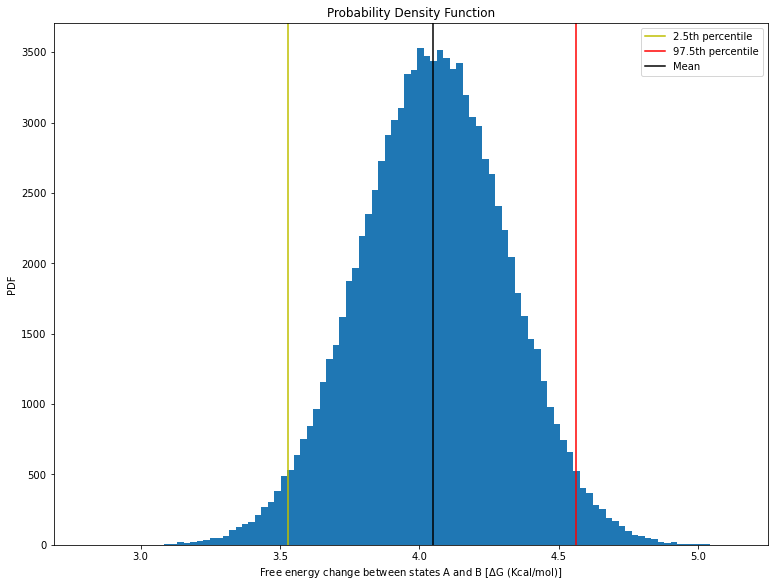

In [79]:
fig = plt.figure(figsize=[12.8, 9.6])


# Plot the PDF for bootstrap replicates as histogram
plt.hist(total_boostrapeado['Total free energy (dG)'],bins=100)

# Showing the related percentiles
plt.axvline(x=np.percentile(total_boostrapeado['Total free energy (dG)'],[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(total_boostrapeado['Total free energy (dG)'],[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')
plt.axvline(x=total_boostrapeado['Total free energy (dG)'].mean(), ymin=0, ymax=1,label='Mean',c='black')

plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

## Obtaining free energy estimates from biological activity

<p>Using Cheng-Prusoff relation, one can relate the $IC_{50}$ with the inhibition constant $K_{i}$ assuming competitive inhibition by means of two expressions:

<b>Relation 1</b> $\frac{IC_{50}^{1}}{IC_{50}^{2}}=\frac{K_{i}^{1}}{K_{i}^{2}}$ 

<b>Relation 2</b> $K_{i}=\frac{IC_{50}}{1+\frac{[S]}{K_{m}}}$ 
    
According to the paper, for the enzyme $K_{m}=220 \pm 21 \mu M$ , $[S]=100 \mu M$, $IC_{50}$ (of this ligand) = $0.010 \pm 831763.77 \mu M$. Also for the reference ligand we have $K_{i}=2.9 \pm 0.33 \mu M $ and $IC_{50}=6.3 \pm 0.7 \mu M$  

</p>

#### Relation 1:

In [80]:
#Values of equilibrium and kinetics parameters. All in M (1M = 10e6 uM)

K_iref= 2.9*10**(-6)
IC_50xtal=10**(-8)
IC_50ref=10**(-5.2)

In [81]:
K_ixtal=IC_50xtal*K_iref/IC_50ref
K_ixtal

4.596190258137231e-09

In [82]:
'{:0.3e}'.format(K_ixtal) ##M

'4.596e-09'

In [83]:
import math

##Standard deviation of each value

K_iref_sd=0.33*(10**(-6))##M
IC_50ref_sd=10**(-0.13) ##M
IC_50xtal_sd=10**(-0.08) ##M

##Size of sampĺe of each value

K_iref_N=2
IC_50ref_N=70 ##M
IC_50xtal_N=2
K_ixtal_N=2

##Uncertainty propagation measurement.

K_ixtal_sd=K_ixtal*math.sqrt((K_iref_sd/K_iref)**2+(IC_50ref_sd/IC_50ref)**2+(IC_50xtal_sd/IC_50xtal)**2)
K_ixtal_sd

0.38229483557002675

### Free energy estimation

<p>Assuming a standard relationship between K and G, we have:
    
$\Delta G_{b}= -RT Ln(K_{b})$ 
    
    
$\Delta G_{i}= RT Ln(K_{i})$</p>

#### Relation 1

In [84]:
##Free energy
R=1.9858775*10**(-3)##kcal/mol*K
T=310 #K
dG_exp=R*T*math.log(K_ixtal)  ##Kcal
round(dG_exp,2)

-11.82

In [85]:
##Standard deviation of experimental free energy
G_exp_sd=K_ixtal_sd/dG_exp
G_exp_sd

-0.032346510264672855

In [86]:
##Confidence interval (Assuming normality of data)

CI_exp_up=dG_exp - (1.96)*(G_exp_sd/np.sqrt(K_ixtal_N)) 
CI_exp_down=dG_exp + (1.96)*(G_exp_sd/np.sqrt(K_ixtal_N)) 
print(CI_exp_up, CI_exp_down)

-11.773905103629481 -11.863565055712492


# Statistical error, significance t-test and confidence interval between experimental and simulated affinity

## Significance t-test

In [87]:
from scipy.stats import ttest_ind_from_stats

(stat,p)=ttest_ind_from_stats(mean1=dG_exp,std1=-G_exp_sd,nobs1=K_ixtal_N,
                     mean2=np.mean(delta_total['Total free energy (dG)']),std2=np.std(delta_total['Total free energy (dG)']),
                     nobs2=len(delta_total['Total free energy (dG)']),equal_var=True)
alpha=0.05 #(95 % significance)

if p>alpha:
    print('True difference between group means is zero (fail to reject H0)')
else:
    print('True difference between group means is different from zero (reject H0)')    

True difference between group means is different from zero (reject H0)


## Effect size

In [88]:
def Hedges_g(s1,s2,n1,n2,mn1,mn2):
    
    s=np.sqrt(((n1-1)*s1*s1+(n2-1)*s2*s2)/(n1+n2-2))
    d=(mn1-mn2)/s
    g=d*(1-(3/(4*(n1+n2)-9)))

    G=g
    if G<0.5:
        print('Small effect (Small difference between means of two variables in terms of standard deviations)')

    elif 0.6 <G or G<0.8:    
        print('Medium effect (Medium difference between means of two variables in terms of standard deviations)')

    elif G>0.9:
        print('Large effect (large difference between means of two variables in terms of standard deviations)')


In [89]:
Hedges_g(-G_exp_sd,np.std(delta_total['Total free energy (dG)']),
                     K_ixtal_N,len(delta_total['Total free energy (dG)']),dG_exp,np.mean(delta_total['Total free energy (dG)']))

Small effect (Small difference between means of two variables in terms of standard deviations)


## Statistical error

In [90]:
error_abs=np.sqrt((dG_exp-np.mean(delta_total['Total free energy (dG)']))**2)
error_abs

15.869538014077051

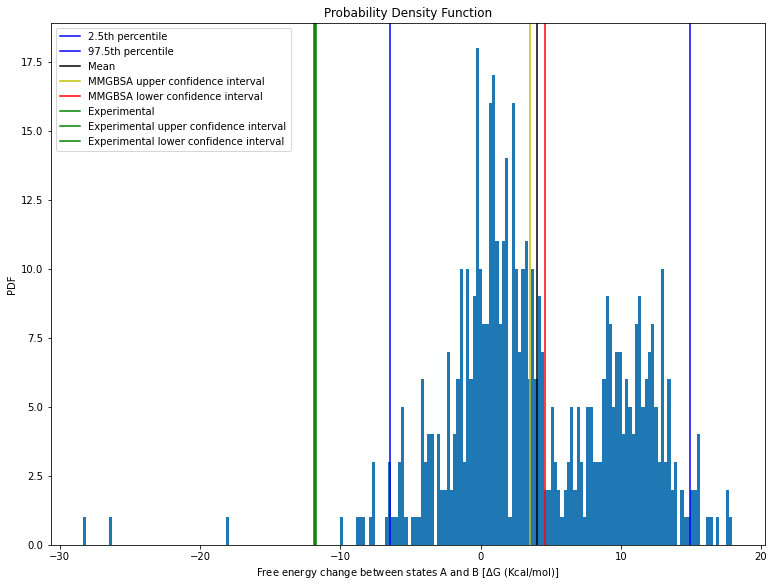

In [91]:
import scipy.stats as st

fig = plt.figure(figsize=[12.8, 9.6])


# Plot the PDF for bootstrap replicates as histogram
plt.hist(delta_total['Total free energy (dG)'],bins=200)

# Showing the related percentiles
plt.axvline(x=np.percentile(delta_total['Total free energy (dG)'],[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='b')
plt.axvline(x=np.percentile(delta_total['Total free energy (dG)'],[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='b')
plt.axvline(x=delta_total['Total free energy (dG)'].mean(), ymin=0, ymax=1,label='Mean',c='black')

plt.axvline(x=st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))[0], ymin=0, ymax=1,label='MMGBSA upper confidence interval',c='y')
plt.axvline(x=st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))[1], ymin=0, ymax=1,label='MMGBSA lower confidence interval',c='r')


plt.axvline(x=dG_exp, ymin=0, ymax=1,label='Experimental',c='green')
plt.axvline(x=dG_exp-(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),
            ymin=0, ymax=1,label='Experimental upper confidence interval',c='green')
plt.axvline(x=dG_exp+(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),
            ymin=0, ymax=1,label='Experimental lower confidence interval ',c='green')


plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

In [92]:
st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)']))

(3.53092245643467, 4.570683412377459)

## Confidence interval

In [93]:
int_confi_dic={}
int_confi_dic['categoria']=['Experimental','MMGBSA-IE']
int_confi_dic['lower']=[dG_exp-(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),(st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)'])))[1]]
int_confi_dic['upper']=[dG_exp+(1.96*G_exp_sd/np.sqrt(K_ixtal_N)),(st.norm.interval(alpha=0.95,loc=np.mean(delta_total['Total free energy (dG)']),
                    scale=st.sem(delta_total['Total free energy (dG)'])))[0]]
int_confi_dic

{'categoria': ['Experimental', 'MMGBSA-IE'],
 'lower': [-11.773905103629481, 4.570683412377459],
 'upper': [-11.863565055712492, 3.53092245643467]}

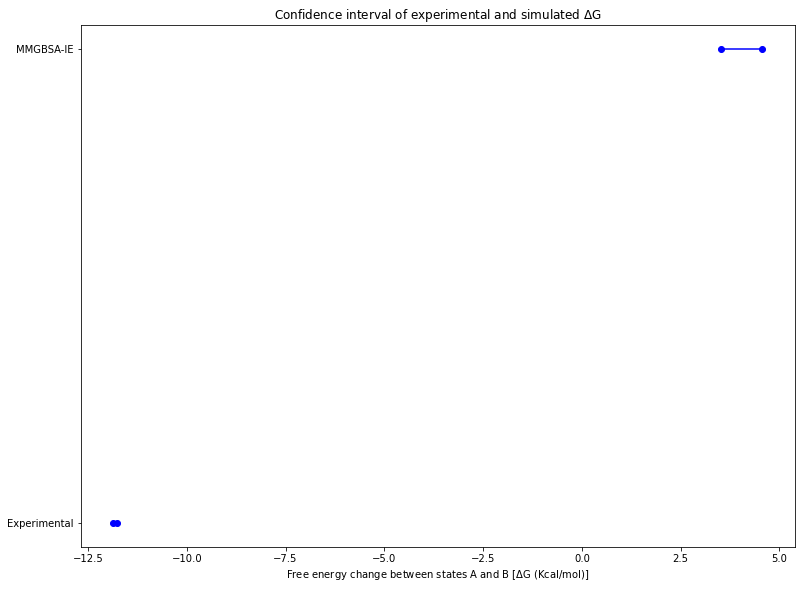

In [94]:
fig = plt.figure(figsize=[12.8, 9.6])

for lower, upper, y in zip(int_confi_dic['lower'],int_confi_dic['upper'],range(len(int_confi_dic))):
    plt.plot((lower, upper),(y,y),'ro-',color='blue')
    
plt.yticks(range(len(int_confi_dic['categoria'])),list(int_confi_dic['categoria']))


plt.xlabel("Free energy change between states A and B [$\\Delta$G (Kcal/mol)]")
plt.title("Confidence interval of experimental and simulated $\\Delta$G")
plt.show()

In [57]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import (
  HydrogenBondAnalysis as HBA)

u_HB =u_ana

hbonds = HBA(universe=u_HB,d_h_cutoff=1.2,d_a_cutoff=3.0,d_h_a_angle_cutoff=150)

protein_hydrogens_sel = "(resid 510 and name HZ1 HZ2 HZ3) or (resid 603 and name HG) or (resid 606 and name H) or (resid 621 and name HZ1 HZ2 HZ3) or (resid 656 and name HD21 HD22) or (resid 657 and name H HD2) or (resid 680 and name H) or (resid 683 and name HD21 HD22) or (resid 742 and name HE2) or (resid 863 and name HG1)"
protein_acceptors_sel = "(resid 602 and name O) or (resid 603 and name OG) or (resid 606 and name O) or (resid 657 and name OD1) or (resid 708 and name O) or (resid 739 and name O) or (resid 742 and name OE1 OE2) or (resid 863 and name OG1)"
protein_donors_sel    = "(resid 510 and name NZ) or (resid 603 and name OG) or (resid 606 and name N) or (resid 621 and name NZ) or (resid 656 and name ND2) or (resid 657 and name N OD2) or (resid 680 and name N) or (resid 683 and name ND2) or (resid 742 and name OE2) or (resid 863 and name OG1)"

lig_hydrogens_sel = "resname MOL and name H30 H31 H32"
lig_acceptors_sel = "resname MOL and name O1 O2 O3 O4 O5"
lig_donors_sel    = "resname MOL and name O3 O4 O5"

hbonds.hydrogens_sel = f"({protein_hydrogens_sel}) or ({lig_hydrogens_sel})"
hbonds.acceptors_sel = f"({protein_acceptors_sel}) or ({lig_acceptors_sel})"
hbonds.donors_sel    = f"({protein_donors_sel}) or ({lig_donors_sel})"
hbonds.run()

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/lib/distances.py:715: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated 

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:519: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts[indices.astype(np.int)] = tmp_counts


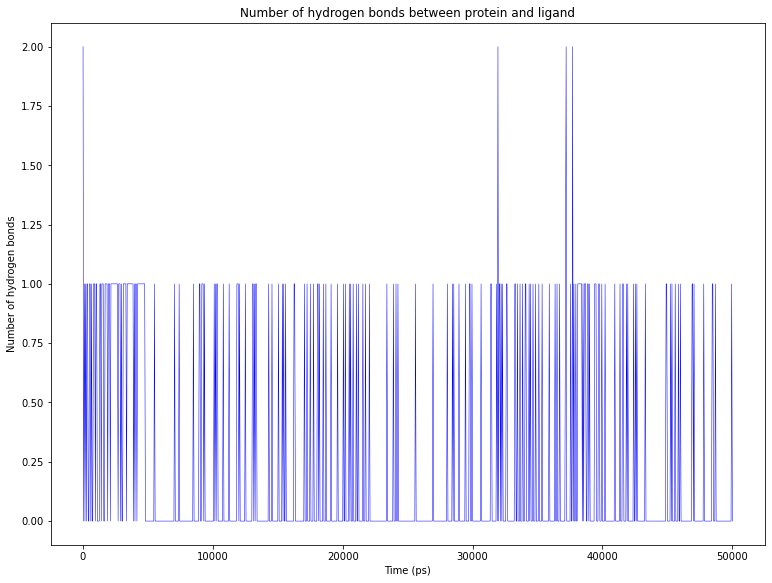

In [58]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax.plot(hbonds.times, hbonds.count_by_time(), 'b-', lw=0.5)
ax.set_title(r"Number of hydrogen bonds between protein and ligand")    
ax.set_xlabel("Time (ps)")
ax.set_ylabel(r"Number of hydrogen bonds")
plt.draw()

### Frequency of apparition of hydrogen bonds between ligand and protein

In [59]:
df_HD = pd.DataFrame(hbonds.count_by_type(), columns = ['Donor','Aceptor','Frequency_apparition'])
df_HD['Frequency_apparition']=df_HD['Frequency_apparition'].astype('int')
df_HD[['Resid_Donor', 'Atom_Donor']] = df_HD['Donor'].str.split(':', expand=True)
df_HD[['Resid_Aceptor', 'Atom_Aceptor']] = df_HD['Aceptor'].str.split(':', expand=True)
df_HD=df_HD.drop(columns=['Donor', 'Aceptor']).sort_values(by=['Frequency_apparition'],ascending=False)
df_HD

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:537: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  d = self.u.atoms[self.hbonds[:, 1].astype(np.int)]
/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:541: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
1                   133        ASPH          N           SER            O
2                    68        ASPH          O           MOL            O
5                     8         LYS          N           MOL            O
0                     7         ASN          N           MOL            O
9                     2         THR          N           MOL            O
3                     1        ASPH          O           SER            O
4                     1         CYS          N           MOL            O
6                     1         MOL          O          GLUH            O
7                     1         MOL          O           MOL            O
8                     1         SER          O           MOL            O

<p><b>Ligand as a donor hydrogen bond</b></p>

In [62]:
df_HD[df_HD['Resid_Donor'].isin(['MOL'])].sort_values(by=['Frequency_apparition'],ascending=False)

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
6                     1         MOL          O          GLUH            O
7                     1         MOL          O           MOL            O

<p><b>Ligand as a acceptor hydrogen bond</b></p>

In [61]:
df_HD[df_HD['Resid_Aceptor'].isin(['MOL'])].sort_values(by=['Frequency_apparition'],ascending=False)

Frequency_apparition Resid_Donor Atom_Donor Resid_Aceptor Atom_Aceptor
2                    68        ASPH          O           MOL            O
5                     8         LYS          N           MOL            O
0                     7         ASN          N           MOL            O
9                     2         THR          N           MOL            O
4                     1         CYS          N           MOL            O
7                     1         MOL          O           MOL            O
8                     1         SER          O           MOL            O

### Clustering Analysis and NCI Analysis

<p>Here we generated 4 clusters for the configurational space of our protein. The goal is to obtain four representative structures (centroids) that are going to be analyzed by means of NCI (non-covalent interaction analysis).</p

In [76]:
CA_Prot = u_ana.select_atoms("name CA") # Atom selection 

CA= []
for ts in u_ana.trajectory:   # iterate through all frames
    G = CA_Prot.positions[0] # Coordinates 1
    CA.append((G))
    CA_a = np.array(CA)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(CA_a)

Text(0.5, 0, 'Z coordinate')

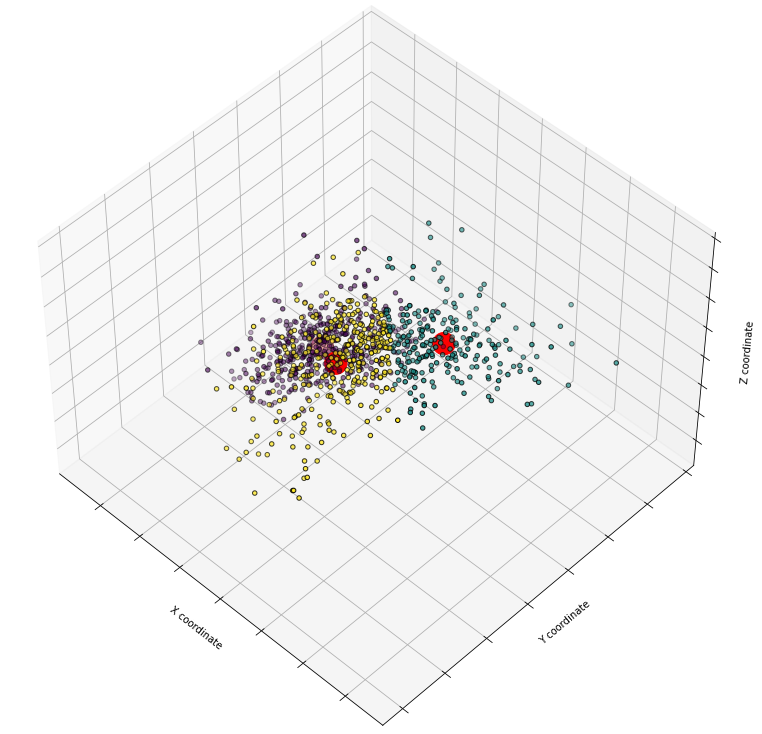

In [80]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
labels = kmeans.labels_

ax.scatter(CA_a[:, 0], CA_a[:, 1], CA_a[:, 2],
               c=labels.astype(float), edgecolor='k')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],s=500,c='red')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Z coordinate')

<p>Let's get the four structures that corresponds to the centroids of the clusters</p>

In [81]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, CA_a)
closest

array([ 63, 994, 345])

### Distance between H-donor in OH-D2 (Asp 657 Protein) and O2 acceptor (Ligand) 

In [63]:
ASP657 = u_ana.select_atoms("resid 657 and name HD2") # Atom selection Protein
LIG2O = u_ana.select_atoms("resname MOL and name O2") # Atom selection Ligand

DIS = []
for ts in u_ana.trajectory:     # iterate through all frames
    G1 = ASP657.positions[0] # Coordinates 1
    G2 = LIG2O.positions[0] # Coordinates 2
    d = G1 - G2 # vector from atom positions
    dist = np.linalg.norm(d) # end-to-end distance
    DIS.append((ts.time, dist))
    DIS_a = np.array(DIS)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Text(0.5, 1.0, 'Distance H donor of OH-D2 of Asp 657 Protein and O carbonyl aceptor Ligand ')

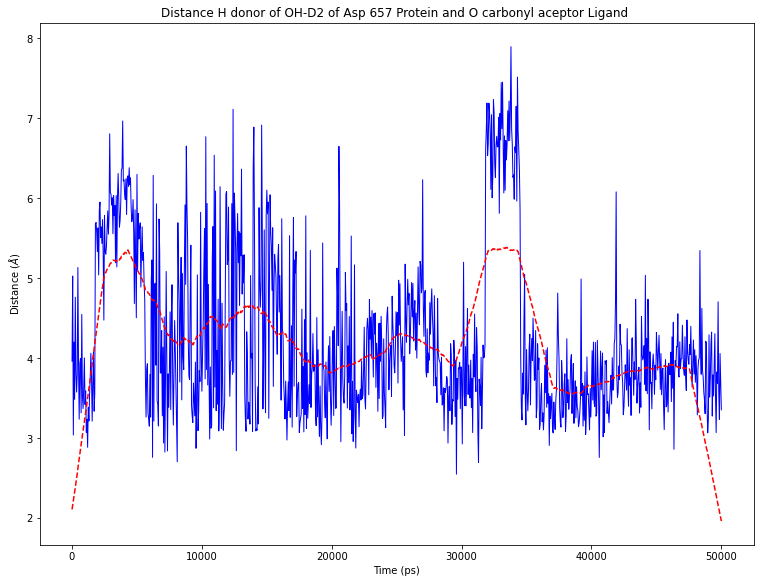

In [66]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax = plt.plot(DIS_a[:,0], DIS_a[:,1], 'b', lw=1)
ax = plt.plot(DIS_a[:,0],moving_average(DIS_a[:,1],100), label='Average convolution hydrogen bond', linestyle='--',c='r')
plt.xlabel("Time (ps)")
plt.ylabel("Distance ($\AA$)")

plt.title('Distance H donor of OH-D2 of Asp 657 Protein and O carbonyl aceptor Ligand ')

In [67]:
HB_Movie=u_ana.select_atoms("(resid 657) or (resname MOL)")
HB_Movie

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AtomGroup with 71 atoms>

In [68]:
HBMD_Movie=nv.show_mdanalysis(HB_Movie,gui=True)
HBMD_Movie

NGLWidget(max_frame=1000)

<p>The hydrogen bonds seems to be pretty metastable</p> 

### Distance between C-5 aliphatic carbon (Ligand) and CA carbon (Gly 681 Protein) 

In [69]:
Gly681CA = u_ana.select_atoms("resid 681 and name CA") # Atom selection Protein
LIGC5 = u_ana.select_atoms("resname MOL and name C5") # Atom selection Ligand

DIS = []
for ts in u_ana.trajectory:     # iterate through all frames
    G1 = Gly681CA.positions[0] # Coordinates 1
    G2 = LIGC5.positions[0] # Coordinates 2
    d = G1 - G2 # vector from atom positions
    dist = np.linalg.norm(d) # end-to-end distance
    DIS.append((ts.time, dist))
    DIS_a = np.array(DIS)

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Text(0.5, 1.0, 'Distance C8 aromatic (Ligand) and C2-$\\gamma$ of Thr 620 (Protein)')

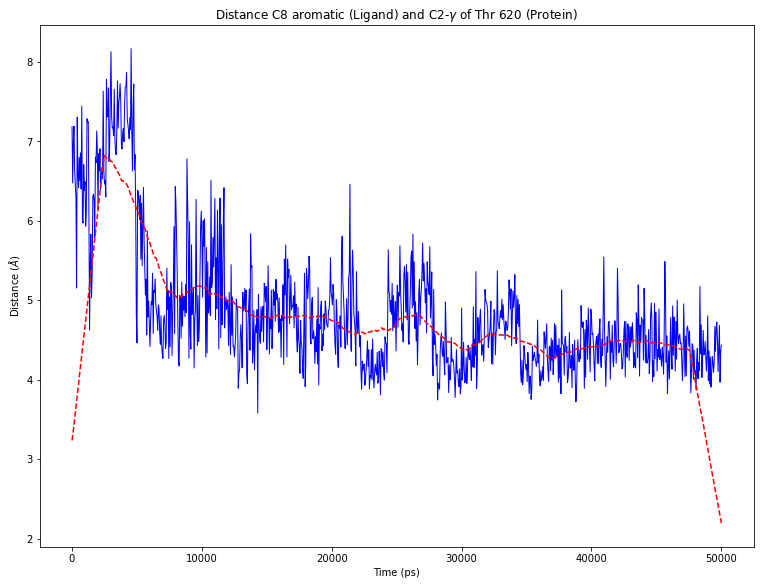

In [70]:
%matplotlib inline
fig = plt.figure(figsize=[12.8, 9.6])
ax = plt.subplot(111)
ax = plt.plot(DIS_a[:,0], DIS_a[:,1], 'b', lw=1)
ax = plt.plot(DIS_a[:,0],moving_average(DIS_a[:,1],100), label='Average convolution hydrophobic interaction', linestyle='--',c='r')
plt.xlabel("Time (ps)")
plt.ylabel("Distance ($\AA$)")
plt.title('Distance C8 aromatic (Ligand) and C2-$\gamma$ of Thr 620 (Protein)')

In [71]:
HB_Movie=u_ana.select_atoms("(resid 681) or (resname MOL)")
HB_Movie

/home/edward/anaconda3/envs/AmberTools20/lib/python3.9/site-packages/MDAnalysis/core/selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AtomGroup with 65 atoms>

In [72]:
HBMD_Movie=nv.show_mdanalysis(HB_Movie,gui=True)
HBMD_Movie

NGLWidget(max_frame=1000)

<p>The hydrophobic collapse seems to be variable (Metastable)</p>